<a href="https://colab.research.google.com/github/TAUforPython/BioMedAI/blob/main/LSTM_KAN_4ch_4cl%20-%20NASA%20cognitive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#
Результаты: <br>

Данные: 20 (испытуемые), 6 (каналов), 4 (класса)  <br>
CNN - LSTM (300 epoch) <br>

CONVx3 + LinerLayer + LSTM + LinerLayer * 2 (Обучаем не обработанные данные) accuracy_train - 64, accuracy_test - 62 <br>
CONVx3 + LinerLayer + LSTM + LinerLayer * 2 (Обучаем обработанные данные) accuracy_train - 62, accuracy_test - 63 <br>

Kolmogorov-Arnold (900 epoch) <br>

CONVx3 + ChebyshevKANLayer + LSTM + ChebyshevKANLayer * 2 (Обучаем не обработанные данные)accuracy_train - 56,  accuracy_test - 61 <br>
CONVx3 + ChebyshevKANLayer + LSTM + ChebyshevKANLayer * 2 (Обучаем обработанные данные) accuracy_train - 58, accuracy_test - 63 <br>

CONVx3 + LinerLayer + TimeSeriesKAN + LinerLayer * 2 (Обучаем не обработанные данные) accuracy_train - 72, accuracy_test - 71 <br>
CONVx3 + LinerLayer + TimeSeriesKAN + LinerLayer * 2 (Обучаем обработанные данные) accuracy_train - 70, accuracy_test - 68


In [ ]:
! pip3 install seaborn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [ ]:
! pip3 install Deep-KAN

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [ ]:
! pip install tensorflow

/bin/bash: pip: command not found


In [ ]:
! pip install mne

/bin/bash: pip: command not found


In [ ]:
! pip install pykan

/bin/bash: pip: command not found


In [ ]:
! pip3 install pykan

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [ ]:
! pip install pyyaml

/bin/bash: pip: command not found


In [ ]:
! pip install imblearn

/bin/bash: pip: command not found


In [ ]:
import mne
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
import math as m

# 1. извлечь и преобразовать данные

## Загрузка данных экспериментов

Собираем датасет из участников

In [ ]:
# кол-во участников
n = 20 + 1
# кол-во сеансов
s = 1

## Задача MATB-II.
Для анализа субъективных оценок RSME был выполнен анализ дисперсии многократных измерений 3 × 3 (сессия: 1, 2, 3; и сложность: легко, средне, сложно). Как и в области субъективных баллов, RMANOVAS выполнялся по выполнению задач отслеживания и мониторинга системы. Это было сделано, так как это были единственные две задачи, оцененные при всех условиях. Для задачи отслеживания в качестве меры производительности использовалось среднее абсолютное расстояние от центра квадрата (среднее расстояние в квадрате корня). Для задачи мониторинга системы использовалось среднее время реакции на сигналы тревоги. Для всех анализов коррекция Greenhouse-Geisser применялась, когда предполагалось предположение о сферичности. Сердечные данные были проанализированы с помощью GLM (Фиксированные факторы: Состояние сеанса x, TOT как ковариат) на зависимых переменных HRV (SDNN или RMSS) и HR (BPM). Для анализа ЭЭГ данные были проанализированы в соответствии со сложностью задачи (Легко; Среднее; Сложно), областью коры (фронтальная и задняя) и тета- и альфа-полосами. GLM (Фиксированные факторы: сессия x Сложность) выполнялась на каждой окупаемости инвестиций (фронтальная, центральная и апостериорная).
    
НАСА разработало задание MATB-II1 для оценки возможности переключения задач и умственной рабочей нагрузки (Santiago-Espada et al., 2011). Здесь участникам представлено до 6 различных задач, которые они должны выполнить одновременно. Это обеспечивает высокореалистичную среду операционных систем, которые исследователь может контролировать для создания различной степени сложности. Использовалась адаптированная версия 2, закодированная в Matlab, но обеспечивающая те же показатели, что и оригинальная задача MATB-II (Verdière et al., 2020). Для получения полного описания первоначальной задачи и подзадач обратитесь к Santiago-Espada и др. (2011). Для этого исследования были использованы комбинации из четырех доступных подзадач MATB. В задаче отслеживания (TRACK) участникам представляется движущаяся цель внутри окна. Цель состоит в том, чтобы, используя джойстик, сохранить цель в окне. Степень сложности может быть изменена путем изменения степени и скорости, с которой движется цель. Для задачи мониторинга системы (SYSMON) участники должны отслеживать датчики и предупреждающие огни. Действие требуется при отсутствии зеленого света, наличии красного света и отклонениях четырех движущихся циферблатов указателей от средней точки. Задача мониторинга системы управляется вводом в конкретные команды клавиатуры. Степень сложности может быть адаптирована путем увеличения количества событий, на которые участник должен реагировать. В задаче связи (COMM) участники должны прослушать радиосообщения и определить, важны ли они для оператора (вызов его/ее позывного) или нет (вызов другого позывного). Если сообщение актуально, оператор должен изменить частоту радиоканала на частоту, указанную в сообщении. Последняя используемая задача - это задача управления ресурсами (RESMAN). Участникам представлен интерфейс, показывающий два основных резервуара и четыре вспомогательных резервуара, соединенные между собой через восемь насосов с различными расходами топлива. Цель состоит в том, чтобы поддерживать определенный уровень жидкости в обоих основных резервуарах. Участники могут сделать это, активировав или отключив насосы. Чтобы увеличить сложность задачи, могут быть введены такие события, как сбои насоса. В текущем исследовании участники выполнили три независимых 5-минутных пробега с тремя степенями сложности (т.е. см. сценарии 2, 3 и 4 в Кабоне и др., 2006). Для легкого состояния участники занимаются только мониторингом системы и задачей отслеживания. Для среднего состояния участники участвуют в обеих задачах, а также в задаче по управлению топливом. Для сложного состояния добавляется коммуникационная задача, а также усложняется задача отслеживания. Перед началом каждого забега участники также получили краткую инструкцию.

### Задача NASA level - beasy (MATBeasy)

In [ ]:
files_MATBeasy_sn = []
for j in range(s):
    for i in range(1, n):
        if len(str(i)) == 1:
            files_MATBeasy_sn.append(f'data/sub-0{i}/ses-S{j+1}/eeg/MATBeasy.set')
        else:
            files_MATBeasy_sn.append(f'data/sub-{i}/ses-S{j+1}/eeg/MATBeasy.set')
len(files_MATBeasy_sn)

20

### Задача NASA level - medium (MATBmed)

In [ ]:
files_MATBmed_sn = []
for j in range(s):
    for i in range(1, n):
        if len(str(i)) == 1:
            files_MATBmed_sn.append(f'data/sub-0{i}/ses-S{j+1}/eeg/MATBmed.set')
        else:
            files_MATBmed_sn.append(f'data/sub-{i}/ses-S{j+1}/eeg/MATBmed.set')
len(files_MATBmed_sn)

20

### Задача NASA level - difficult (MATBdiff)

In [ ]:
files_MATBdiff_sn = []
for j in range(s):
    for i in range(1, n):
        if len(str(i)) == 1:
            files_MATBdiff_sn.append(f'data/sub-0{i}/ses-S{j+1}/eeg/MATBdiff.set')
        else:
            files_MATBdiff_sn.append(f'data/sub-{i}/ses-S{j+1}/eeg/MATBdiff.set')
len(files_MATBdiff_sn)

20

## Данные в состоянии покая (до/после)

### Данные в состоянии покоя перед экспериментом

In [ ]:
files_RS_Beg_EC_sn = []
for j in range(s):
    for i in range(1, n):
        if len(str(i)) == 1:
            files_RS_Beg_EC_sn.append(f'data/sub-0{i}/ses-S{j+1}/eeg/RS_Beg_EC.set')
        else:
            files_RS_Beg_EC_sn.append(f'data/sub-{i}/ses-S{j+1}/eeg/RS_Beg_EC.set')
len(files_RS_Beg_EC_sn)

20

In [ ]:
files_RS_Beg_EO_sn = []
for j in range(s):
    for i in range(1, n):
        if len(str(i)) == 1:
            files_RS_Beg_EO_sn.append(f'data/sub-0{i}/ses-S{j+1}/eeg/RS_Beg_EO.set')
        else:
            files_RS_Beg_EO_sn.append(f'data/sub-{i}/ses-S{j+1}/eeg/RS_Beg_EO.set')
len(files_RS_Beg_EO_sn)

20

### Данные в состоянии покоя после эксперимента

In [ ]:
files_RS_End_EO_sn = []
for j in range(s):
    for i in range(1, n):
        if len(str(i)) == 1:
            files_RS_End_EO_sn.append(f'data/sub-0{i}/ses-S{j+1}/eeg/RS_End_EO.set')
        else:
            files_RS_End_EO_sn.append(f'data/sub-{i}/ses-S{j+1}/eeg/RS_End_EO.set')
len(files_RS_End_EO_sn)

20

In [ ]:
files_RS_End_EC_sn = []
for j in range(s):
    for i in range(1, n):
        if len(str(i)) == 1:
            files_RS_End_EC_sn.append(f'data/sub-0{i}/ses-S{j+1}/eeg/RS_End_EC.set')
        else:
            files_RS_End_EC_sn.append(f'data/sub-{i}/ses-S{j+1}/eeg/RS_End_EC.set')
len(files_RS_End_EC_sn)

20

### Склейка данных

In [ ]:
cognitive_load_1 = files_MATBdiff_sn #files_MATBeasy_sn #+ files_MATBmed_sn + files_MATBdiff_sn
cognitive_load_0 = files_RS_Beg_EC_sn + files_RS_Beg_EO_sn + files_RS_End_EO_sn + files_RS_End_EC_sn
print(len(cognitive_load_1), len(cognitive_load_0))

20 80


In [ ]:
cognitive_MATBdiff_load_1 = files_MATBdiff_sn #files_MATBeasy_sn #+ files_MATBmed_sn + files_MATBdiff_sn
cognitive_MATBmed_load_1 = files_MATBmed_sn #files_MATBeasy_sn #+ files_MATBmed_sn + files_MATBdiff_sn
cognitive_MATBeasy_load_1 = files_MATBeasy_sn #files_MATBeasy_sn #+ files_MATBmed_sn + files_MATBdiff_sn

cognitive_RS_Beg_EC_load_0 = files_RS_Beg_EC_sn
cognitive_RS_Beg_EO_load_0 = files_RS_Beg_EO_sn
cognitive_RS_End_EO_load_0 = files_RS_End_EO_sn
cognitive_RS_End_EC_load_0 = files_RS_End_EC_sn


In [ ]:
chanels =  [
    'Fp1', 'Fz', 'F3', 'F7', 'FC5', 'FC1', 'C3',
     'T7',  'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2',
     'P4', 'P8',  'CP6', 'CP2', 'FCz', 'C4', 'T8',
     'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'AF7', 'AF3', 'AFz', 'F1',
     'F5', 'FT7', 'FC3', 'C1', 'C5', 'TP7', 'CP3', 'P1', 'P5',
     'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'P6', 'P2', 'CPz', 'CP4',
     'TP8', 'C6', 'C2', 'FC4', 'FT8', 'F6', 'AF8', 'AF4', 'F2'
]

In [ ]:
chanels =  [
    'Fp1', 'Fp2', 'T7', 'T8', 'O1', 'O2'
]

In [ ]:
chanels_dict = dict()

for i in range(len(chanels)):
    chanels_dict[chanels[i]] = i

In [ ]:
cognitive_MATBeasy_load_1

['data/sub-01/ses-S1/eeg/MATBeasy.set',
 'data/sub-02/ses-S1/eeg/MATBeasy.set',
 'data/sub-03/ses-S1/eeg/MATBeasy.set',
 'data/sub-04/ses-S1/eeg/MATBeasy.set',
 'data/sub-05/ses-S1/eeg/MATBeasy.set',
 'data/sub-06/ses-S1/eeg/MATBeasy.set',
 'data/sub-07/ses-S1/eeg/MATBeasy.set',
 'data/sub-08/ses-S1/eeg/MATBeasy.set',
 'data/sub-09/ses-S1/eeg/MATBeasy.set',
 'data/sub-10/ses-S1/eeg/MATBeasy.set',
 'data/sub-11/ses-S1/eeg/MATBeasy.set',
 'data/sub-12/ses-S1/eeg/MATBeasy.set',
 'data/sub-13/ses-S1/eeg/MATBeasy.set',
 'data/sub-14/ses-S1/eeg/MATBeasy.set',
 'data/sub-15/ses-S1/eeg/MATBeasy.set',
 'data/sub-16/ses-S1/eeg/MATBeasy.set',
 'data/sub-17/ses-S1/eeg/MATBeasy.set',
 'data/sub-18/ses-S1/eeg/MATBeasy.set',
 'data/sub-19/ses-S1/eeg/MATBeasy.set',
 'data/sub-20/ses-S1/eeg/MATBeasy.set']

In [ ]:
def read_data(file):
    data = mne.io.read_raw_eeglab(file, preload=True)
    data.set_eeg_reference()
    data.filter(l_freq=0.5, h_freq=45)
    epochs = mne.make_fixed_length_epochs(data, duration=5, overlap=1)
    array = epochs.get_data(picks=chanels)
    return array

In [ ]:
%%capture
m1 = [len(read_data(i)) for i in tqdm(cognitive_load_1)]
m2 = [len(read_data(i)) for i in tqdm(cognitive_load_0)]

In [ ]:
print(m1, m2)

[74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74] [14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14]


In [ ]:
%%capture
cognitive_MATBdiff_ep_ar = [read_data(i) for i in tqdm(cognitive_MATBdiff_load_1)]
cognitive_MATBmed_ep_ar = [read_data(i) for i in tqdm(cognitive_MATBmed_load_1)]
cognitive_MATBeasy_ep_ar = [read_data(i) for i in tqdm(cognitive_MATBeasy_load_1)]

cognitive_RS_Beg_EC_ep_ar = [read_data(i) for i in tqdm(cognitive_RS_Beg_EC_load_0)]
cognitive_RS_Beg_EO_ep_ar = [read_data(i) for i in tqdm(cognitive_RS_Beg_EO_load_0)]
cognitive_RS_End_EO_ar_ar = [read_data(i) for i in tqdm(cognitive_RS_End_EO_load_0)]
cognitive_RS_End_EC_ep_ar = [read_data(i) for i in tqdm(cognitive_RS_End_EC_load_0)]

In [ ]:
print(cognitive_MATBdiff_ep_ar[0].shape, cognitive_RS_Beg_EC_ep_ar[0].shape)

(74, 6, 2500) (14, 6, 2500)


In [ ]:
len(cognitive_MATBdiff_ep_ar)

20

In [ ]:
ep_label_6 = [len(i) * [3] for i in cognitive_MATBdiff_ep_ar]
ep_label_5 = [len(i) * [2] for i in cognitive_MATBmed_ep_ar]
ep_label_4 = [len(i) * [1] for i in cognitive_MATBeasy_ep_ar]

ep_label_3 = [len(i) * [0] for i in cognitive_RS_End_EC_ep_ar]
ep_label_2 = [len(i) * [0] for i in cognitive_RS_End_EO_ar_ar]
ep_label_1 = [len(i) * [0] for i in cognitive_RS_Beg_EO_ep_ar]
ep_label_0 = [len(i) * [0] for i in cognitive_RS_Beg_EC_ep_ar]
print(len(ep_label_6), len(ep_label_5),len(ep_label_4), len(ep_label_3), len(ep_label_2), len(ep_label_1), len(ep_label_0))

20 20 20 20 20 20 20


In [ ]:
print(2500 * 74 * 3, 2500 * 14 * 4)
print(2500 * 74 * 3 + 2500 * 14 * 4)

555000 140000
695000


In [ ]:
df_X = cognitive_MATBdiff_ep_ar + cognitive_MATBmed_ep_ar + cognitive_MATBeasy_ep_ar + cognitive_RS_Beg_EC_ep_ar + cognitive_RS_Beg_EO_ep_ar + cognitive_RS_End_EO_ar_ar + cognitive_RS_End_EC_ep_ar
len(df_X)

140

In [ ]:
df_Y = ep_label_0 + ep_label_1 + ep_label_2 + ep_label_3 + ep_label_4 + ep_label_5 + ep_label_6
len(df_Y)

140

In [ ]:
df_group = [[i] * len(j) for i, j in enumerate(df_X)]
len(df_group)

140

In [ ]:
len(df_X[0][0])

6

In [ ]:
df_X = np.concatenate((cognitive_MATBdiff_ep_ar, cognitive_MATBmed_ep_ar, cognitive_MATBeasy_ep_ar, cognitive_RS_Beg_EC_ep_ar, cognitive_RS_Beg_EO_ep_ar, cognitive_RS_End_EO_ar_ar, cognitive_RS_End_EC_ep_ar), axis=1)


обработке данных ЭЭГ (https://arxiv.org/abs/2409.05989) <br>
набор данных df_X с формой (B, N, C, T), где B - размер пакета, N - количество электродов, C - количество каналов, и T - количество временных отсчетов в каждом электроде.<br>

Чтобы обработать данные, были выполнены следующие шаги: <br>

фильтр Баттерворта с полосой пропускания к данным, чтобы удалить избыточный шум.<br>
данные ЭЭГ на четыре различных полосы: Тета (4-8 Гц), Альфа (8-13 Гц), Бета (13-30 Гц) и Гамма (>30 Гц).<br>
Рассчитать среднюю плотность спектральной мощности (PSD) для каждой полосы в каждом канале.


In [ ]:
import numpy as np
import scipy.signal as signal
from scipy import fft
from scipy.signal import periodogram


# Step 1: Apply Butterworth band-pass filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y

fs = 100.0
lowcut = 0.3
highcut = 25.0

filtered_data = np.zeros_like(df_X)
for i in range(df_X.shape[0]):
    for j in range(df_X.shape[1]):
        for k in range(df_X.shape[2]):
            filtered_data[i, j, k, :] = butter_bandpass_filter(df_X[i, j, k, :], lowcut, highcut, fs, order=5)

# Step 2: Categorize EEG data into four bands
bands = [(4, 8), (8, 13), (13, 30), (30, np.inf)]  # Theta, Alpha, Beta, Gamma
band_names = ['Theta', 'Alpha', 'Beta', 'Gamma']

# Step 3: Calculate mean PSD for each band in each channel
psd_data = np.zeros((df_X.shape[0], df_X.shape[1], df_X.shape[2], len(bands)))
for i in range(df_X.shape[0]):
    for j in range(df_X.shape[1]):
        for k in range(df_X.shape[2]):
            for band_idx, (low, high) in enumerate(bands):
                freq, psd = periodogram(filtered_data[i, j, k, :], fs=fs, window='hann')

                mask = (freq >= low) & (freq <= high)
                psd_data[i, j, k, band_idx] = np.mean(psd[mask])


In [ ]:
df_Y = np.concatenate((ep_label_0, ep_label_1, ep_label_2, ep_label_3, ep_label_4, ep_label_5, ep_label_6), axis=1)
df_Y.shape

(20, 278)

In [ ]:
df_X.shape

(20, 278, 6, 2500)

In [ ]:
df_group = np.array([[i] * len(j) for i, j in enumerate(df_X)])
df_group.shape

(20, 278)

In [ ]:
psd_data.shape

(20, 278, 6, 4)

# Извлечение признаков

# LSTM

Архитектурв: CNNx3 -> LSTM -> классификатор х2

In [ ]:
df_all_clean_array_old = np.vstack(psd_data)
df_Y_array_old = np.vstack(df_Y).reshape(-1)
df_group_array_old = np.hstack(df_group)
df_all_clean_array_old = np.moveaxis(df_all_clean_array,1,2).transpose(0, 2, 1)

print(df_all_clean_array_old.shape, df_Y_array_old.shape, df_group_array_old.shape)

(5560, 4, 6) (5560,) (5560,)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

def balance_data(df_all_clean_array, df_Y_array):

    classes = np.unique(df_Y_array)

    class_counts = np.array([np.sum(df_Y_array == c) for c in classes])

    min_count = np.min(class_counts)

    balanced_indices = []

    for c in classes:
        class_indices = np.where(df_Y_array == c)[0]

        balanced_class_indices = np.random.choice(class_indices, size=min_count, replace=False)

        balanced_indices.extend(balanced_class_indices)

    balanced_df_all_clean_array = df_all_clean_array[balanced_indices]
    balanced_df_Y_array = df_Y_array[balanced_indices]

    return balanced_df_all_clean_array, balanced_df_Y_array

balanced_df_all_clean_array_old, balanced_df_Y_array_old = balance_data(df_all_clean_array_old, df_Y_array_old)

# CONVx3 + LinerLayer + LSTM + LinerLayer * 2 (Обучаем не обработанные данные)

Epoch 0: Train loss 1.3895946826253618, Val loss 1.3859785284314836, Train accuracy 0.28822544642857145, Val accuracy 0.2734375
Epoch 1: Train loss 1.3614183408873421, Val loss 1.3504350866590227, Train accuracy 0.322265625, Val accuracy 0.33482142857142855
Epoch 2: Train loss 1.3308533387524741, Val loss 1.317693863596235, Train accuracy 0.35909598214285715, Val accuracy 0.375
Epoch 3: Train loss 1.3295686883585793, Val loss 1.3180796929768153, Train accuracy 0.35630580357142855, Val accuracy 0.359375
Epoch 4: Train loss 1.3190713567393166, Val loss 1.344272460256304, Train accuracy 0.37220982142857145, Val accuracy 0.34486607142857145
Epoch 5: Train loss 1.315947140966143, Val loss 1.3088087013789587, Train accuracy 0.3744419642857143, Val accuracy 0.375
Epoch 6: Train loss 1.3118969202041626, Val loss 1.2969031504222326, Train accuracy 0.3794642857142857, Val accuracy 0.4029017857142857
Epoch 7: Train loss 1.3085899353027344, Val loss 1.290453655379159, Train accuracy 0.377232142857

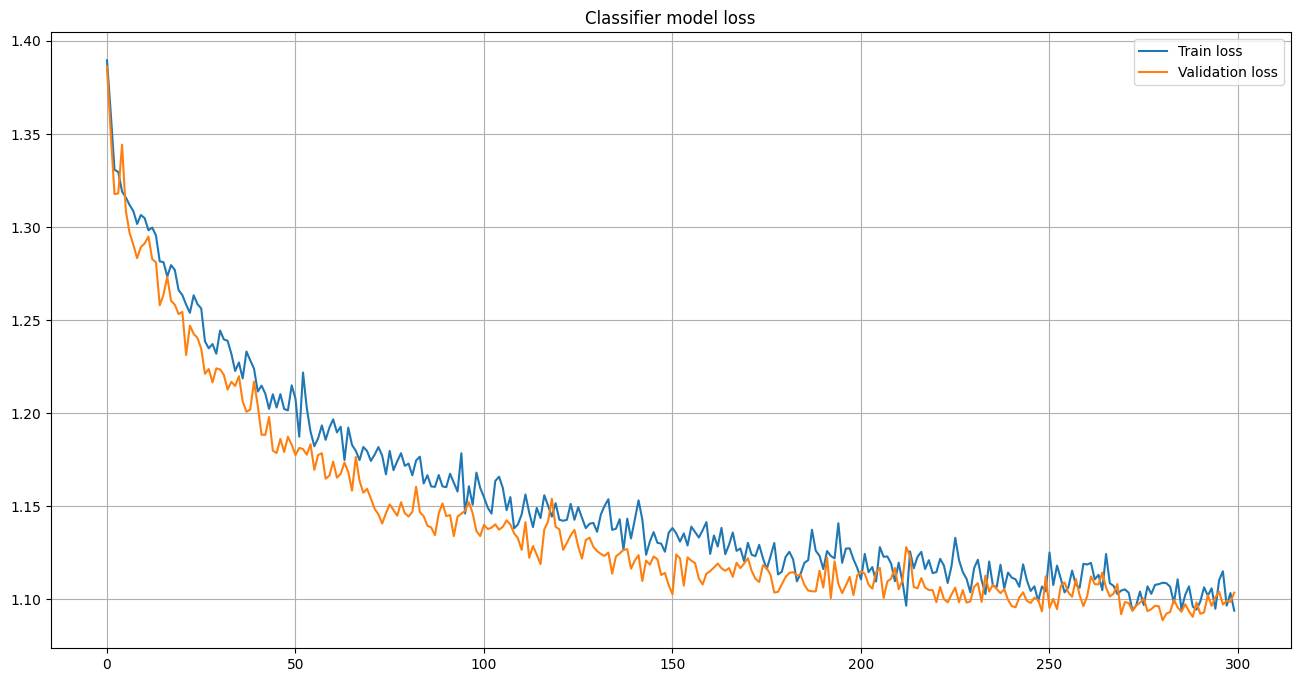

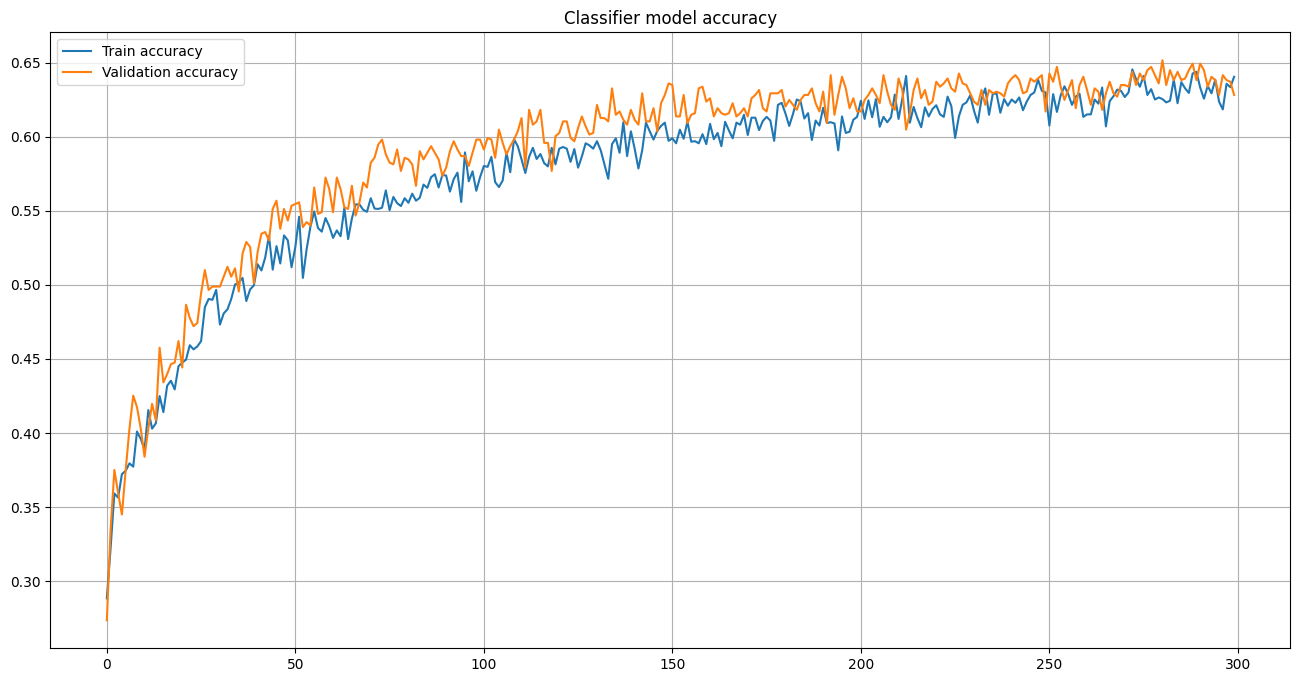

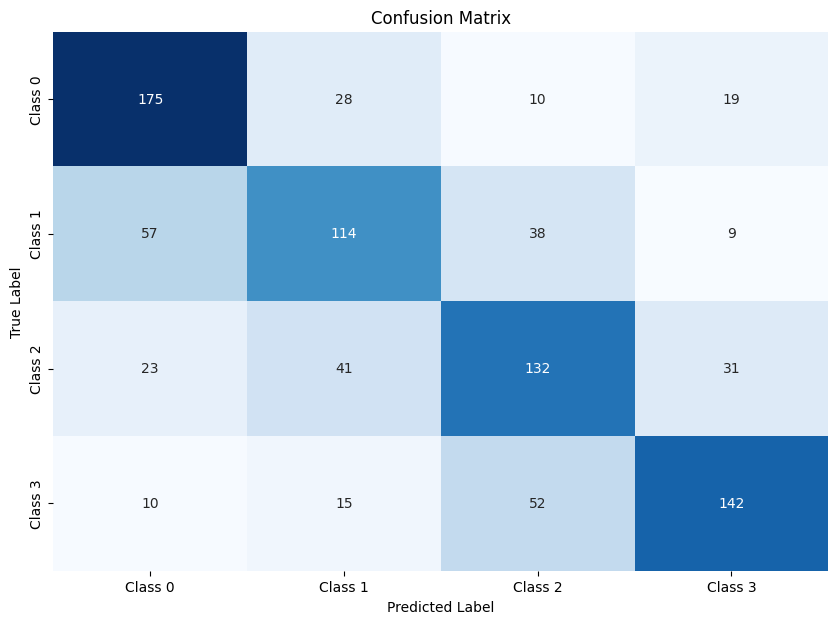

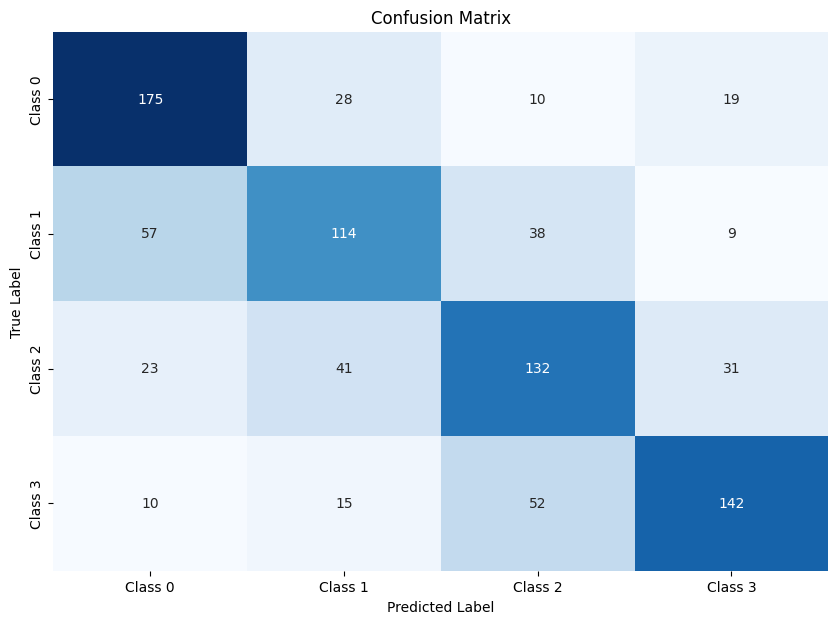

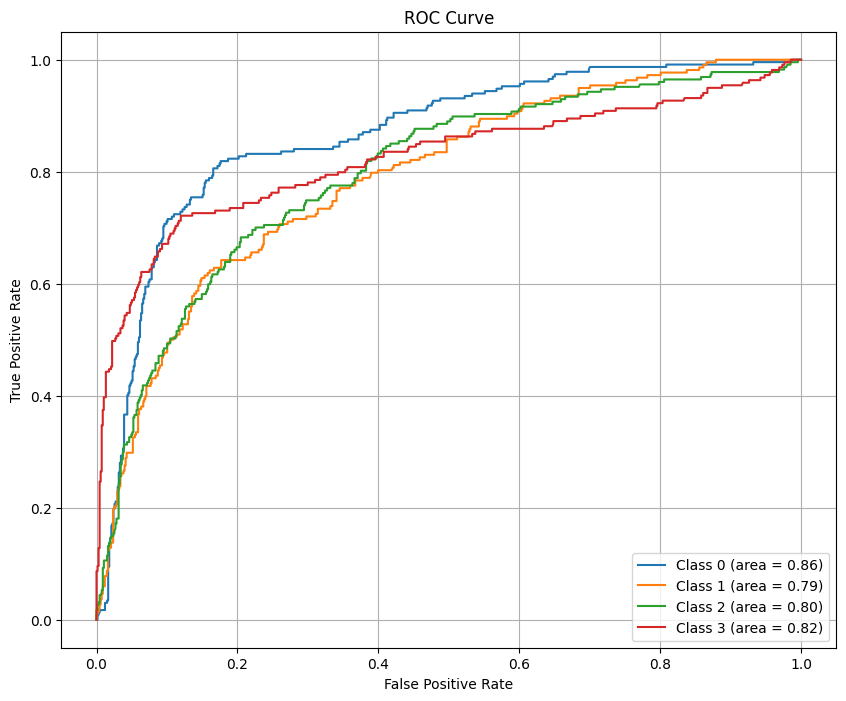

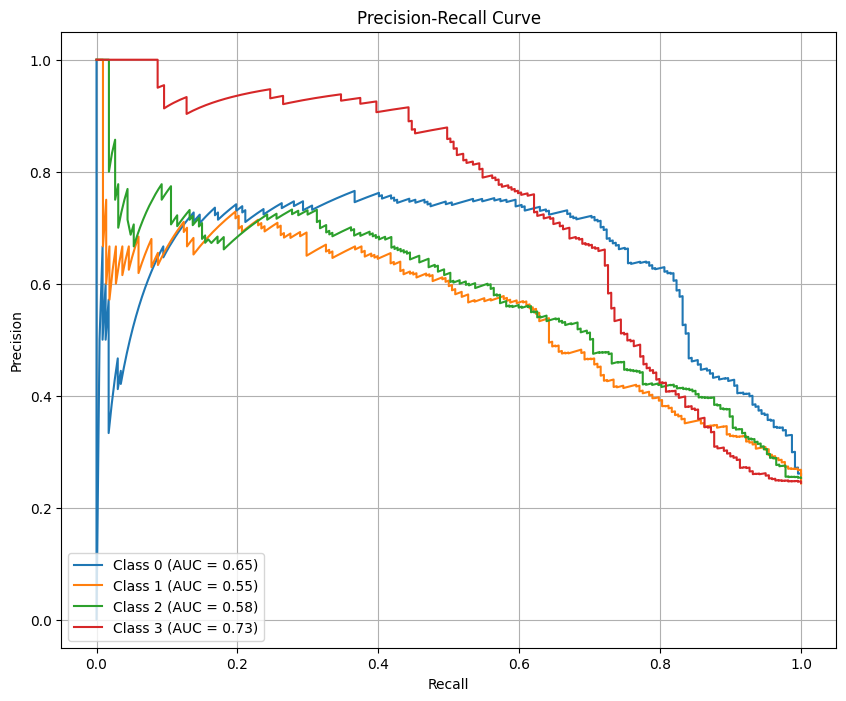

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, roc_curve

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler

import torch
import torch.nn as nn
import torch.nn.functional as F

class MAEEG(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(MAEEG, self).__init__()

        self.conv1 = nn.Conv1d(in_channels=input_dim, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.dropout1 = nn.Dropout(0.5)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.adaptive_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.conv5 = nn.Conv1d(in_channels=256, out_channels=128, kernel_size=3, stride=1)
        self.global_pool = nn.AdaptiveAvgPool1d(1)
        self.fc0 = nn.Linear(in_features=128, out_features=512)

        self.lstm = nn.LSTM(input_size=512, hidden_size=256, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)

        self.fc1 = nn.Linear(in_features=512, out_features=64)
        self.bn1 = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(in_features=64, out_features=num_classes)

    def forward(self, x):

        x = F.relu(self.conv1(x))
        x = self.dropout1(x)
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.dropout1(x)
        x = F.relu(self.conv3(x))
        x = self.dropout1(x)

        #x = self.adaptive_pool(x)

        #x = x.squeeze(2)

        x = self.conv5(x)
        x = F.leaky_relu(x)
        x = self.global_pool(x)

        x = x.view(x.size(0), -1)

        x = self.fc0(x)

        x, _ = self.lstm(x)

        #x = x[:, -1, :]

        x = self.fc1(x)
        x = self.bn1(x)
        x = self.fc2(x)
        x = F.softmax(x, dim=1)

        return x




def train_classifier(model, train_loader, optimizer, loss_fn):
    model.train()
    train_loss = 0
    correct_train_preds = 0
    total_train_preds = 0

    for x, y in train_loader:
        optimizer.zero_grad()
        output = model(x)
        loss = loss_fn(output, y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()


        _, predicted = torch.max(output, 1)
        correct_train_preds += (predicted == y).sum().item()
        total_train_preds += y.size(0)

    train_accuracy = correct_train_preds / total_train_preds
    return train_loss / len(train_loader), train_accuracy

def evaluate_classifier(model, loader):
    model.eval()
    all_preds = []
    all_probs = []
    all_labels = []
    with torch.no_grad():
        for x, y in loader:
            output = model(x)
            probs = F.softmax(output, dim=1)
            preds = torch.argmax(output, dim=1)
            all_preds.append(preds)
            all_probs.append(probs)
            all_labels.append(y)
    preds = torch.cat(all_preds)
    probs = torch.cat(all_probs)
    labels = torch.cat(all_labels)
    accuracy = accuracy_score(labels.numpy(), preds.numpy())
    return accuracy, preds, labels, probs



def evaluate_loss(model, loader, loss_fn):
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for x, y in loader:
            output = model(x)
            loss = loss_fn(output, y)
            val_loss += loss.item()
    return val_loss / len(loader)

def plot_stats(train_loss, val_loss, train_accuracy, valid_accuracy, title):
    plt.figure(figsize=(16, 8))
    plt.title(title + ' loss')
    plt.plot(train_loss, label='Train loss')
    plt.plot(val_loss, label='Validation loss')
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(16, 8))
    plt.title(title + ' accuracy')
    plt.plot(train_accuracy, label='Train accuracy')
    plt.plot(valid_accuracy, label='Validation accuracy')
    plt.legend()
    plt.grid()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, num_classes):
    cm = confusion_matrix(y_true, y_pred, labels=range(num_classes))
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=[f'Class {i}' for i in range(num_classes)],
                yticklabels=[f'Class {i}' for i in range(num_classes)])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

def plot_roc_auc_curve(y_true, y_probs, num_classes):
    plt.figure(figsize=(10, 8))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_true == i, y_probs[:, i])
        plt.plot(fpr, tpr, label=f'Class {i} (area = {auc(fpr, tpr):.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

def plot_precision_recall_curve(y_true, y_probs, num_classes):
    plt.figure(figsize=(10, 8))
    for i in range(num_classes):
        precision, recall, _ = precision_recall_curve(y_true == i, y_probs[:, i])
        plt.plot(recall, precision, label=f'Class {i} (AUC = {auc(recall, precision):.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.grid()
    plt.show()

def train_and_evaluate_classifier(df_all_clean_array, df_Y_array, num_classes):
    input_dim = df_all_clean_array.shape[1]

    accuracy_train = []
    accuracy_test = []

    val_labels_history = []
    val_preds_history = []
    val_probs_history = []

    train_features, val_features, train_labels, val_labels = train_test_split(df_all_clean_array, df_Y_array, test_size=0.2, random_state=42)

    train_accuracy_history = []
    valid_accuracy_history = []

    train_loss_history = []
    valid_loss_history = []

    scaler = StandardScaler()
    train_features = scaler.fit_transform(train_features.reshape(-1, train_features.shape[-1])).reshape(train_features.shape)
    val_features = scaler.transform(val_features.reshape(-1, val_features.shape[-1])).reshape(val_features.shape)

    train_features = torch.tensor(train_features, dtype=torch.float32)
    val_features = torch.tensor(val_features, dtype=torch.float32)
    train_labels = torch.tensor(train_labels, dtype=torch.long)
    val_labels = torch.tensor(val_labels, dtype=torch.long)


    class_counts = torch.bincount(train_labels)
    class_weights = 1. / class_counts.float()
    sample_weights = class_weights[train_labels]


    sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

    train_loader = DataLoader(TensorDataset(train_features, train_labels), batch_size=128, sampler=sampler)
    val_loader = DataLoader(TensorDataset(val_features, val_labels), batch_size=128, shuffle=False)

    model = MAEEG(input_dim, num_classes)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    loss_fn = nn.CrossEntropyLoss()

    for epoch in range(300):
        train_loss, train_accuracy = train_classifier(model, train_loader, optimizer, loss_fn)
        train_loss_history.append(train_loss)
        val_loss = evaluate_loss(model, val_loader, loss_fn)
        valid_loss_history.append(val_loss)
        val_accuracy, val_preds, val_labels, val_probs = evaluate_classifier(model, val_loader)
        valid_accuracy_history.append(val_accuracy)
        train_accuracy_history.append(train_accuracy)
        print(f'Epoch {epoch}: Train loss {train_loss}, Val loss {val_loss}, Train accuracy {train_accuracy}, Val accuracy {val_accuracy}')

    accuracy_train.append(evaluate_classifier(model, train_loader))
    accuracy_test.append(evaluate_classifier(model, val_loader))

    plot_stats(train_loss_history, valid_loss_history, train_accuracy_history, valid_accuracy_history, 'Classifier model')


    val_labels_np = val_labels.numpy()
    val_preds_np = val_preds.numpy()
    val_probs_np = val_probs.numpy()


    val_labels_history = np.concatenate((val_labels_history, val_labels_np), axis=0) if len(val_labels_history) > 0 else val_labels_np
    val_preds_history = np.concatenate((val_preds_history, val_preds_np), axis=0) if len(val_preds_history) > 0 else val_preds_np
    val_probs_history = np.concatenate((val_probs_history, val_probs_np), axis=0) if len(val_probs_history) > 0 else val_probs_np

    plot_confusion_matrix(val_labels_np, val_preds_np, num_classes)

    plot_confusion_matrix(val_labels_history, val_preds_history, num_classes)
    plot_roc_auc_curve(val_labels_history, val_probs_history, num_classes)
    plot_precision_recall_curve(val_labels_history, val_probs_history, num_classes)

    return accuracy_train, accuracy_test




accuracy_train, accuracy_test = train_and_evaluate_classifier(balanced_df_all_clean_array_old, balanced_df_Y_array_old,  num_classes=4)

# CONVx3 + LinerLayer + LSTM + LinerLayer * 2 (Обучаем обработанные данные)

Epoch 0: Train loss 1.3847128255026682, Val loss 1.361175709300571, Train accuracy 0.2897931654676259, Val accuracy 0.3210431654676259
Epoch 1: Train loss 1.3378520556858609, Val loss 1.3319510089026556, Train accuracy 0.35386690647482016, Val accuracy 0.3471223021582734
Epoch 2: Train loss 1.334106353351048, Val loss 1.324114892217848, Train accuracy 0.3552158273381295, Val accuracy 0.3642086330935252
Epoch 3: Train loss 1.3265952212469918, Val loss 1.308336032761468, Train accuracy 0.3693794964028777, Val accuracy 0.3920863309352518
Epoch 4: Train loss 1.3083962099892752, Val loss 1.303532361984253, Train accuracy 0.3898381294964029, Val accuracy 0.3830935251798561
Epoch 5: Train loss 1.3040794849395752, Val loss 1.2896924946043227, Train accuracy 0.3887140287769784, Val accuracy 0.40197841726618705
Epoch 6: Train loss 1.3054407494408744, Val loss 1.2932602564493816, Train accuracy 0.39276079136690645, Val accuracy 0.4262589928057554
Epoch 7: Train loss 1.3057221582957677, Val loss 1

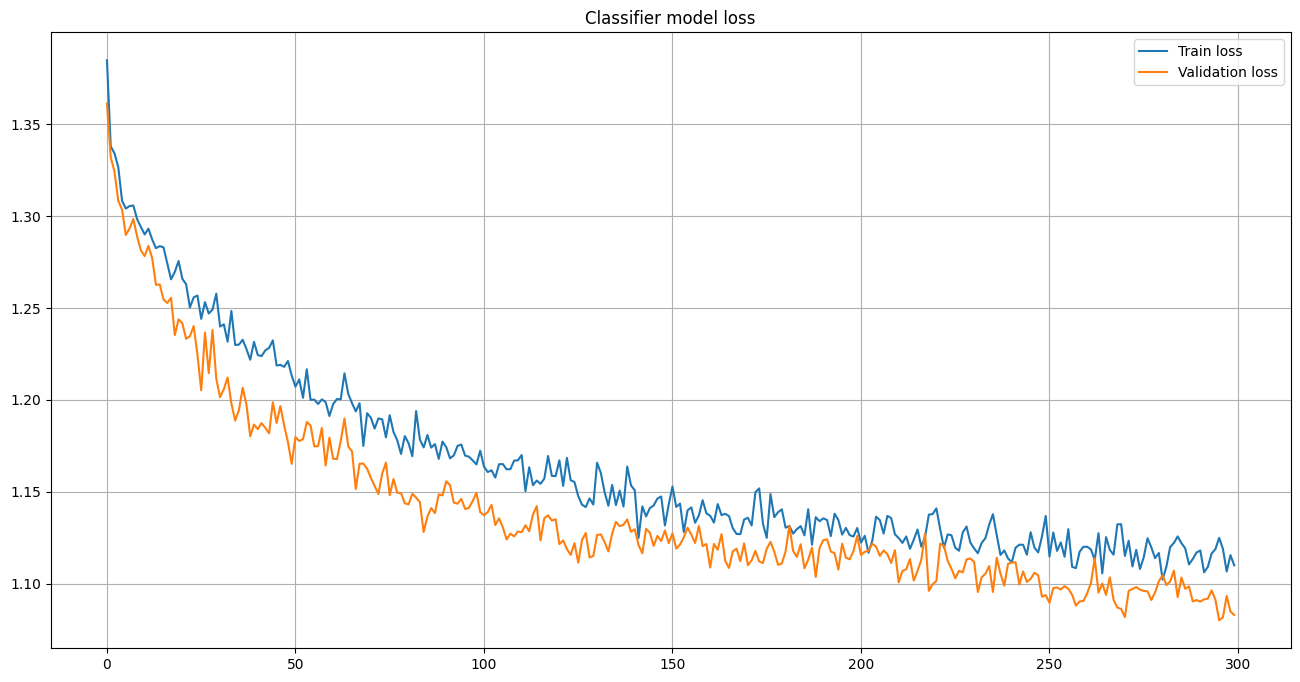

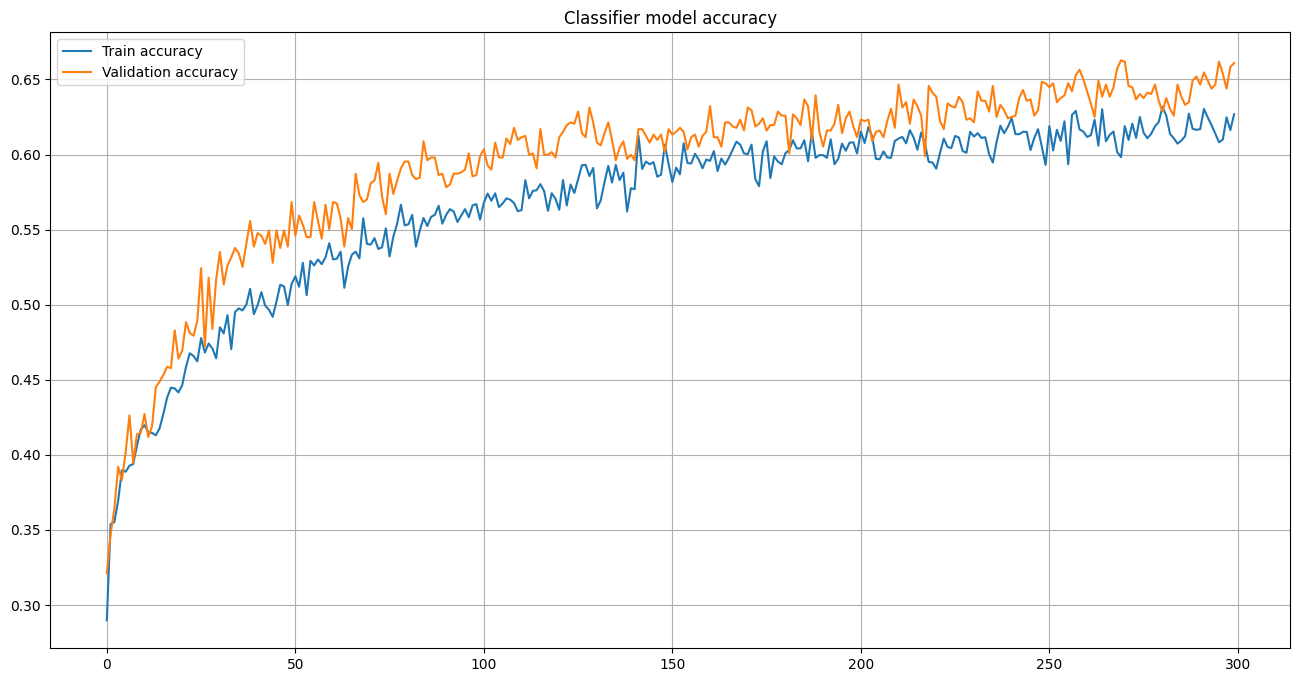

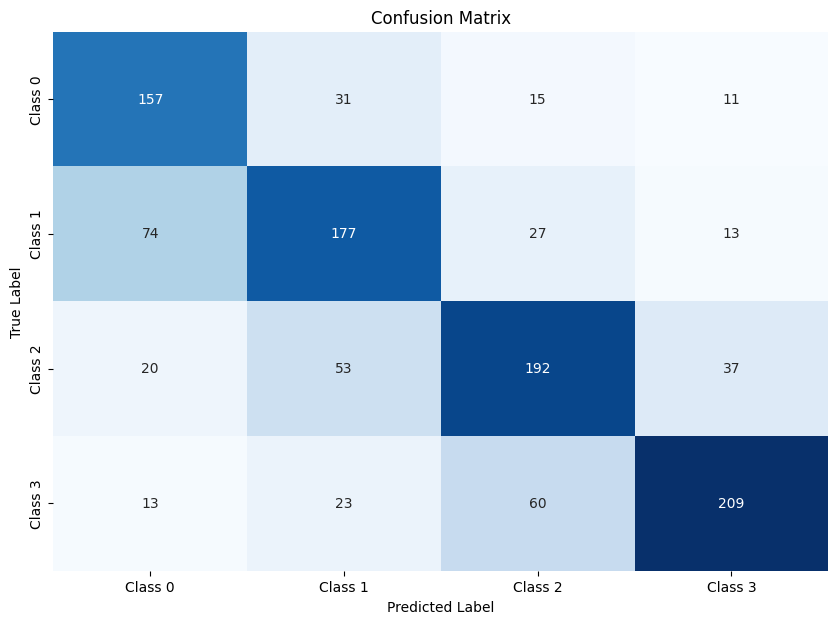

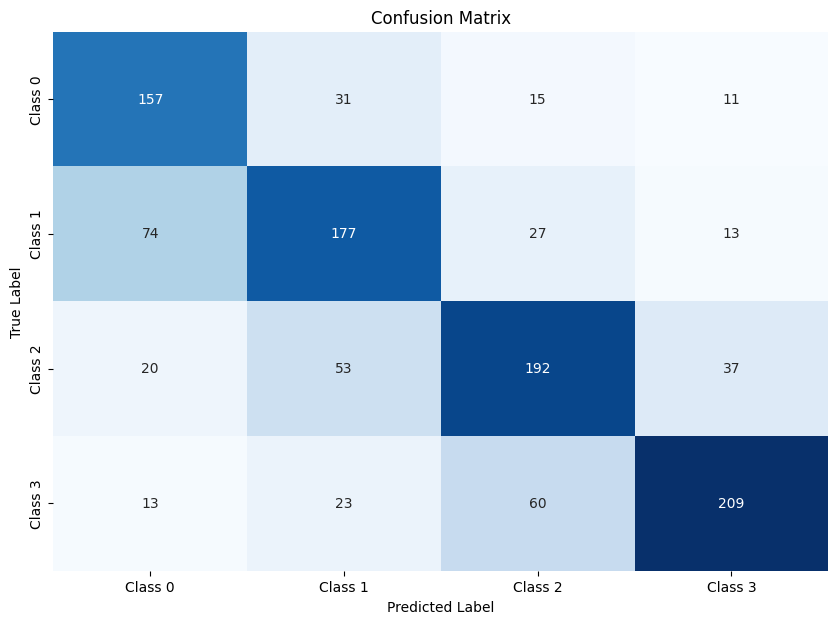

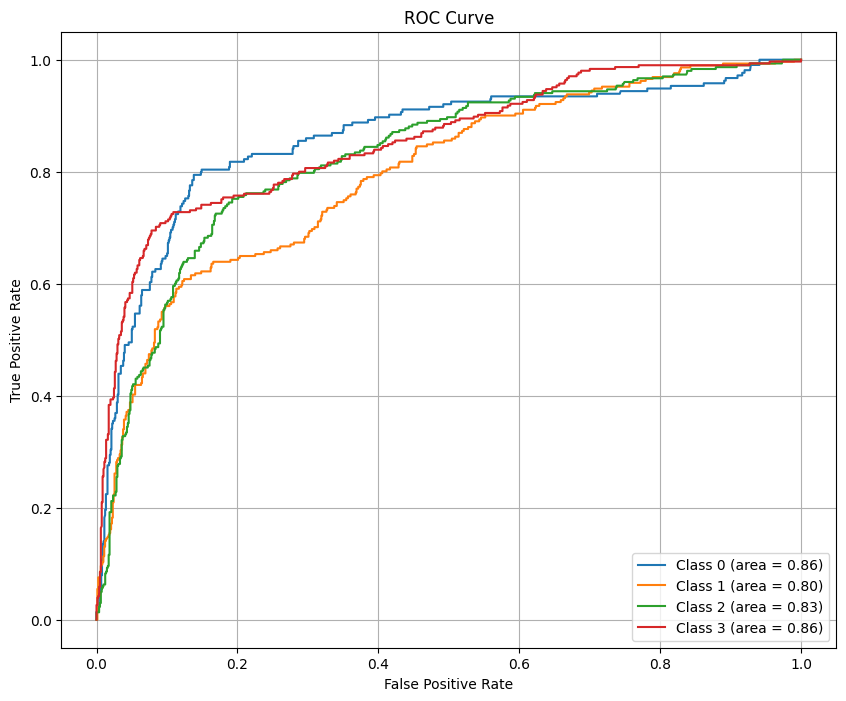

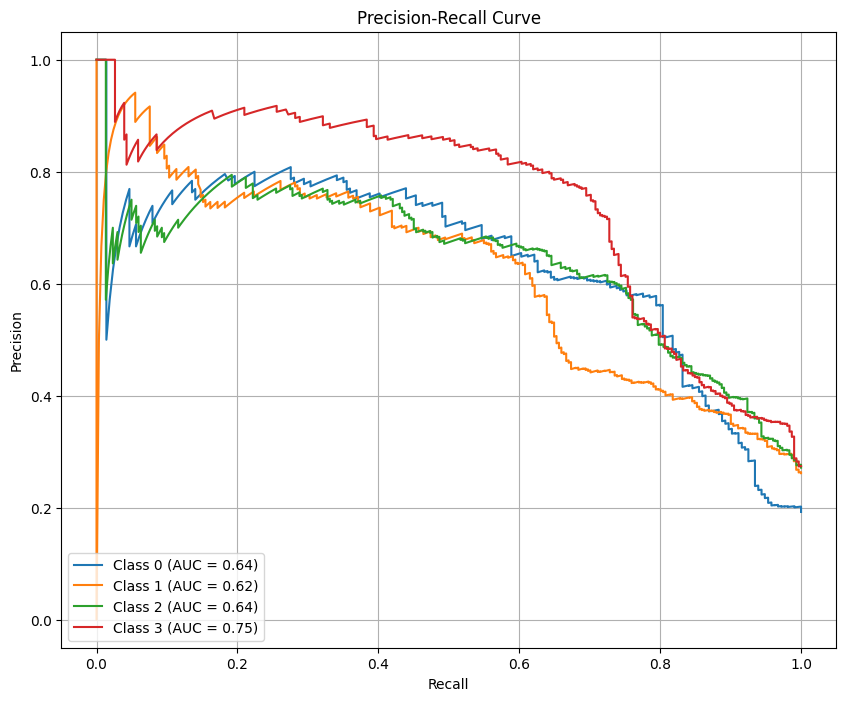

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, roc_curve

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler

import torch
import torch.nn as nn
import torch.nn.functional as F

class MAEEG(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(MAEEG, self).__init__()

        self.conv1 = nn.Conv1d(in_channels=input_dim, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.dropout1 = nn.Dropout(0.5)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.adaptive_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.conv5 = nn.Conv1d(in_channels=256, out_channels=128, kernel_size=3, stride=1)
        self.global_pool = nn.AdaptiveAvgPool1d(1)
        self.fc0 = nn.Linear(in_features=128, out_features=512)

        self.lstm = nn.LSTM(input_size=512, hidden_size=256, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)

        self.fc1 = nn.Linear(in_features=512, out_features=64)
        self.bn1 = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(in_features=64, out_features=num_classes)

    def forward(self, x):

        x = F.relu(self.conv1(x))
        x = self.dropout1(x)
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.dropout1(x)
        x = F.relu(self.conv3(x))
        x = self.dropout1(x)

        #x = self.adaptive_pool(x)

        #x = x.squeeze(2)

        x = self.conv5(x)
        x = F.leaky_relu(x)
        x = self.global_pool(x)

        x = x.view(x.size(0), -1)

        x = self.fc0(x)

        x, _ = self.lstm(x)

        #x = x[:, -1, :]

        x = self.fc1(x)
        x = self.bn1(x)
        x = self.fc2(x)
        x = F.softmax(x, dim=1)

        return x




def train_classifier(model, train_loader, optimizer, loss_fn):
    model.train()
    train_loss = 0
    correct_train_preds = 0
    total_train_preds = 0

    for x, y in train_loader:
        optimizer.zero_grad()
        output = model(x)
        loss = loss_fn(output, y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()


        _, predicted = torch.max(output, 1)
        correct_train_preds += (predicted == y).sum().item()
        total_train_preds += y.size(0)

    train_accuracy = correct_train_preds / total_train_preds
    return train_loss / len(train_loader), train_accuracy

def evaluate_classifier(model, loader):
    model.eval()
    all_preds = []
    all_probs = []
    all_labels = []
    with torch.no_grad():
        for x, y in loader:
            output = model(x)
            probs = F.softmax(output, dim=1)
            preds = torch.argmax(output, dim=1)
            all_preds.append(preds)
            all_probs.append(probs)
            all_labels.append(y)
    preds = torch.cat(all_preds)
    probs = torch.cat(all_probs)
    labels = torch.cat(all_labels)
    accuracy = accuracy_score(labels.numpy(), preds.numpy())
    return accuracy, preds, labels, probs



def evaluate_loss(model, loader, loss_fn):
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for x, y in loader:
            output = model(x)
            loss = loss_fn(output, y)
            val_loss += loss.item()
    return val_loss / len(loader)

def plot_stats(train_loss, val_loss, train_accuracy, valid_accuracy, title):
    plt.figure(figsize=(16, 8))
    plt.title(title + ' loss')
    plt.plot(train_loss, label='Train loss')
    plt.plot(val_loss, label='Validation loss')
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(16, 8))
    plt.title(title + ' accuracy')
    plt.plot(train_accuracy, label='Train accuracy')
    plt.plot(valid_accuracy, label='Validation accuracy')
    plt.legend()
    plt.grid()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, num_classes):
    cm = confusion_matrix(y_true, y_pred, labels=range(num_classes))
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=[f'Class {i}' for i in range(num_classes)],
                yticklabels=[f'Class {i}' for i in range(num_classes)])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

def plot_roc_auc_curve(y_true, y_probs, num_classes):
    plt.figure(figsize=(10, 8))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_true == i, y_probs[:, i])
        plt.plot(fpr, tpr, label=f'Class {i} (area = {auc(fpr, tpr):.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

def plot_precision_recall_curve(y_true, y_probs, num_classes):
    plt.figure(figsize=(10, 8))
    for i in range(num_classes):
        precision, recall, _ = precision_recall_curve(y_true == i, y_probs[:, i])
        plt.plot(recall, precision, label=f'Class {i} (AUC = {auc(recall, precision):.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.grid()
    plt.show()

def train_and_evaluate_classifier(df_all_clean_array, df_Y_array, num_classes):
    input_dim = df_all_clean_array.shape[1]

    accuracy_train = []
    accuracy_test = []

    val_labels_history = []
    val_preds_history = []
    val_probs_history = []

    train_features, val_features, train_labels, val_labels = train_test_split(df_all_clean_array, df_Y_array, test_size=0.2, random_state=42)

    train_accuracy_history = []
    valid_accuracy_history = []

    train_loss_history = []
    valid_loss_history = []

    scaler = StandardScaler()
    train_features = scaler.fit_transform(train_features.reshape(-1, train_features.shape[-1])).reshape(train_features.shape)
    val_features = scaler.transform(val_features.reshape(-1, val_features.shape[-1])).reshape(val_features.shape)

    train_features = torch.tensor(train_features, dtype=torch.float32)
    val_features = torch.tensor(val_features, dtype=torch.float32)
    train_labels = torch.tensor(train_labels, dtype=torch.long)
    val_labels = torch.tensor(val_labels, dtype=torch.long)


    class_counts = torch.bincount(train_labels)
    class_weights = 1. / class_counts.float()
    sample_weights = class_weights[train_labels]


    sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

    train_loader = DataLoader(TensorDataset(train_features, train_labels), batch_size=128, sampler=sampler)
    val_loader = DataLoader(TensorDataset(val_features, val_labels), batch_size=128, shuffle=False)

    model = MAEEG(input_dim, num_classes)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    loss_fn = nn.CrossEntropyLoss()

    for epoch in range(300):
        train_loss, train_accuracy = train_classifier(model, train_loader, optimizer, loss_fn)
        train_loss_history.append(train_loss)
        val_loss = evaluate_loss(model, val_loader, loss_fn)
        valid_loss_history.append(val_loss)
        val_accuracy, val_preds, val_labels, val_probs = evaluate_classifier(model, val_loader)
        valid_accuracy_history.append(val_accuracy)
        train_accuracy_history.append(train_accuracy)
        print(f'Epoch {epoch}: Train loss {train_loss}, Val loss {val_loss}, Train accuracy {train_accuracy}, Val accuracy {val_accuracy}')

    accuracy_train.append(evaluate_classifier(model, train_loader))
    accuracy_test.append(evaluate_classifier(model, val_loader))

    plot_stats(train_loss_history, valid_loss_history, train_accuracy_history, valid_accuracy_history, 'Classifier model')


    val_labels_np = val_labels.numpy()
    val_preds_np = val_preds.numpy()
    val_probs_np = val_probs.numpy()


    val_labels_history = np.concatenate((val_labels_history, val_labels_np), axis=0) if len(val_labels_history) > 0 else val_labels_np
    val_preds_history = np.concatenate((val_preds_history, val_preds_np), axis=0) if len(val_preds_history) > 0 else val_preds_np
    val_probs_history = np.concatenate((val_probs_history, val_probs_np), axis=0) if len(val_probs_history) > 0 else val_probs_np

    plot_confusion_matrix(val_labels_np, val_preds_np, num_classes)

    plot_confusion_matrix(val_labels_history, val_preds_history, num_classes)
    plot_roc_auc_curve(val_labels_history, val_probs_history, num_classes)
    plot_precision_recall_curve(val_labels_history, val_probs_history, num_classes)

    return accuracy_train, accuracy_test




accuracy_train, accuracy_test = train_and_evaluate_classifier(df_all_clean_array_old, df_Y_array_old,  num_classes=4)


In [ ]:
balanced_df_all_clean_array.shape

(336, 4, 6)

# KAN

Далее экспер. с различными вариациями применения слоев Kolmogorov arnold. https://github.com/sidhu2690/Deep-KAN/blob/main/README.md

В планах так же опробовать KANwalvet

https://arxiv.org/abs/2405.12832

https://arxiv.org/abs/2405.08790

https://arxiv.org/abs/2405.07344

### CONVx3 + ChebyshevKANLayer + LSTM + ChebyshevKANLayer * 2 (Обучаем не обработанные данные) (Обучаем не обработанные данные)

Epoch 0: Train loss 1.4232873099190848, Val loss 1.4018115335040622, Train accuracy 0.25651978417266186, Val accuracy 0.3012589928057554
Epoch 1: Train loss 1.4047523600714547, Val loss 1.3905068238576253, Train accuracy 0.28552158273381295, Val accuracy 0.29676258992805754
Epoch 2: Train loss 1.390722462109157, Val loss 1.3543059428532918, Train accuracy 0.2983363309352518, Val accuracy 0.3435251798561151
Epoch 3: Train loss 1.3602486644472396, Val loss 1.3648948536978827, Train accuracy 0.3448741007194245, Val accuracy 0.3426258992805755
Epoch 4: Train loss 1.3699362925120762, Val loss 1.3411226802402072, Train accuracy 0.3284622302158273, Val accuracy 0.36510791366906475
Epoch 5: Train loss 1.3594128063746862, Val loss 1.353860444492764, Train accuracy 0.3408273381294964, Val accuracy 0.34532374100719426
Epoch 6: Train loss 1.3496720348085676, Val loss 1.3364091714223225, Train accuracy 0.3549910071942446, Val accuracy 0.3642086330935252
Epoch 7: Train loss 1.342448834010533, Val lo

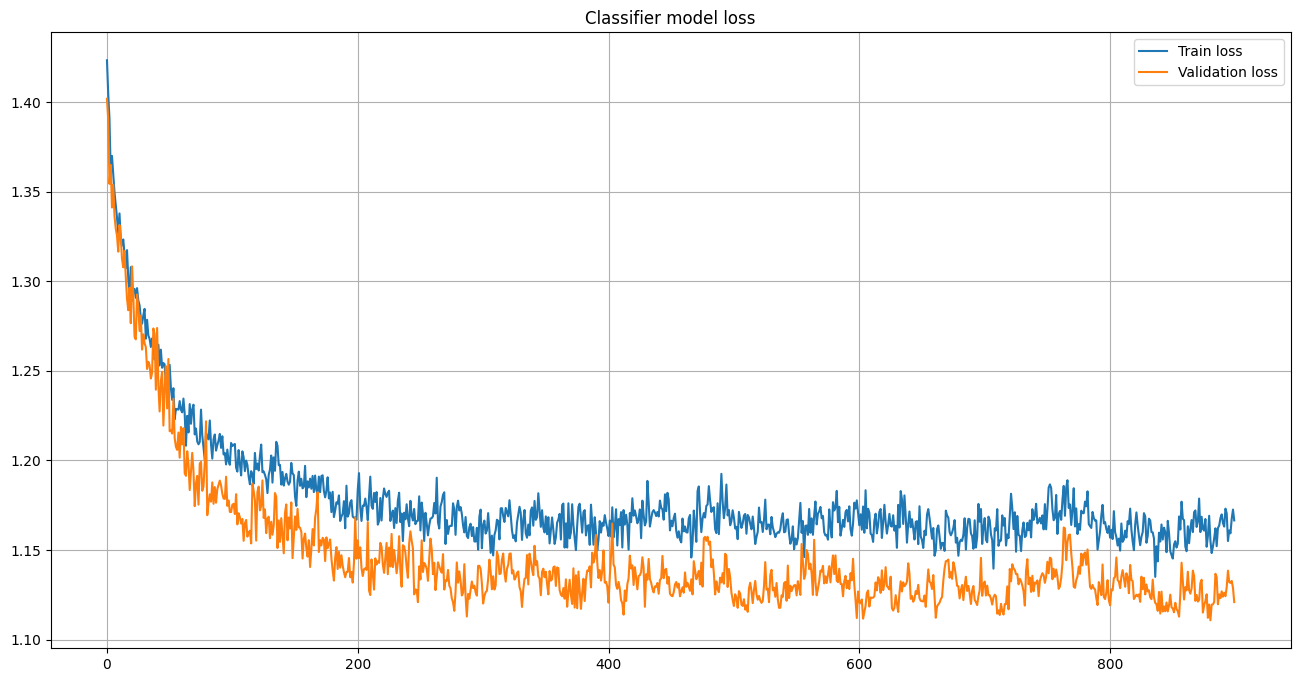

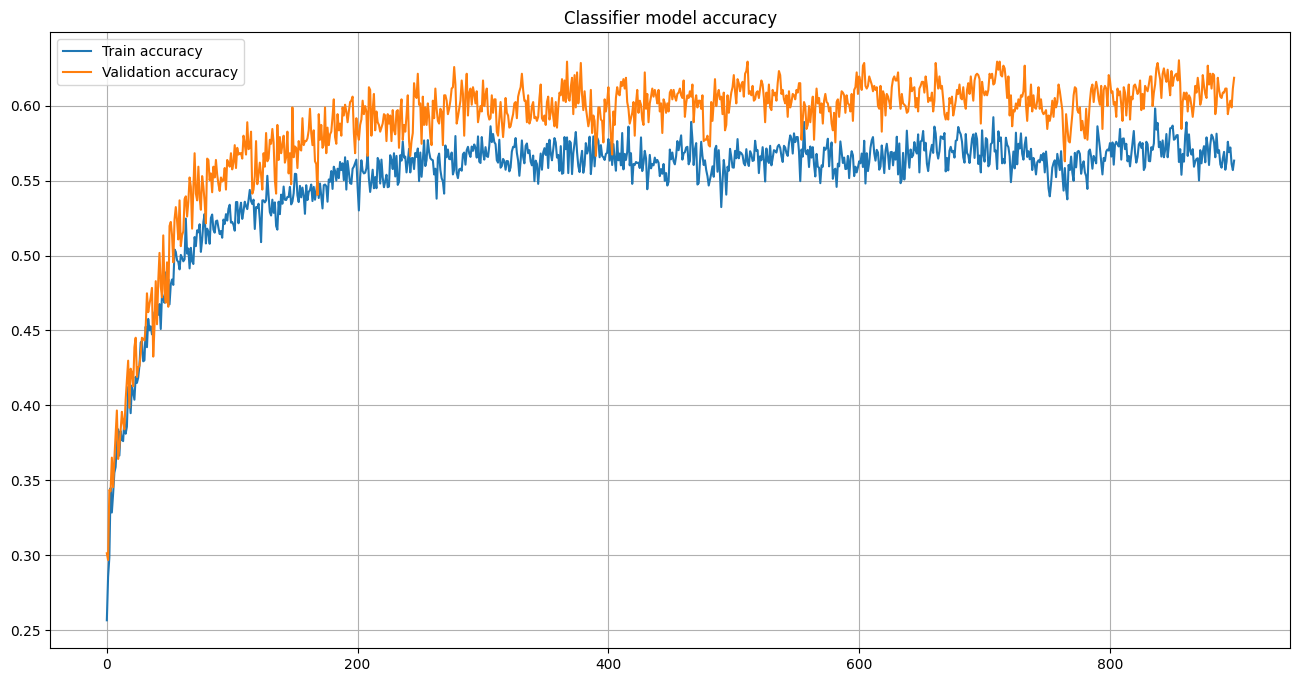

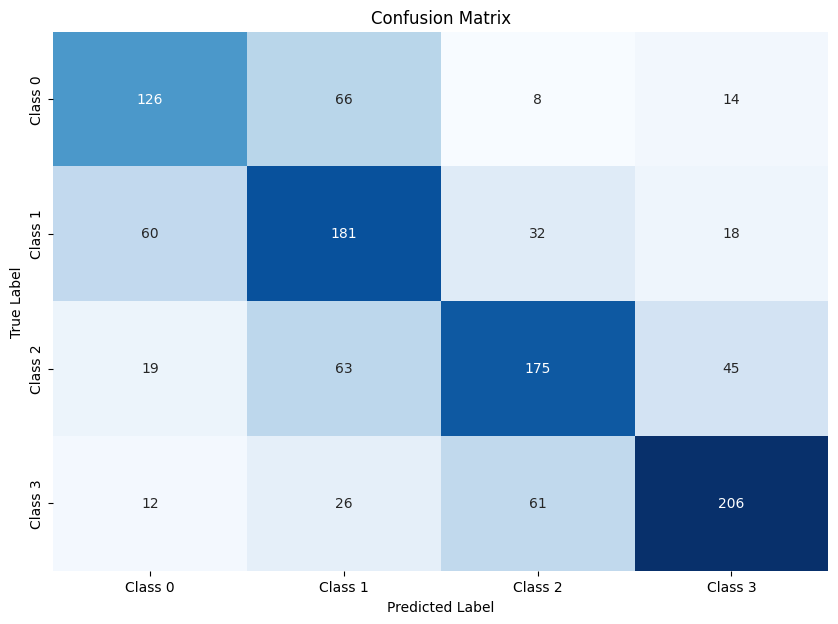

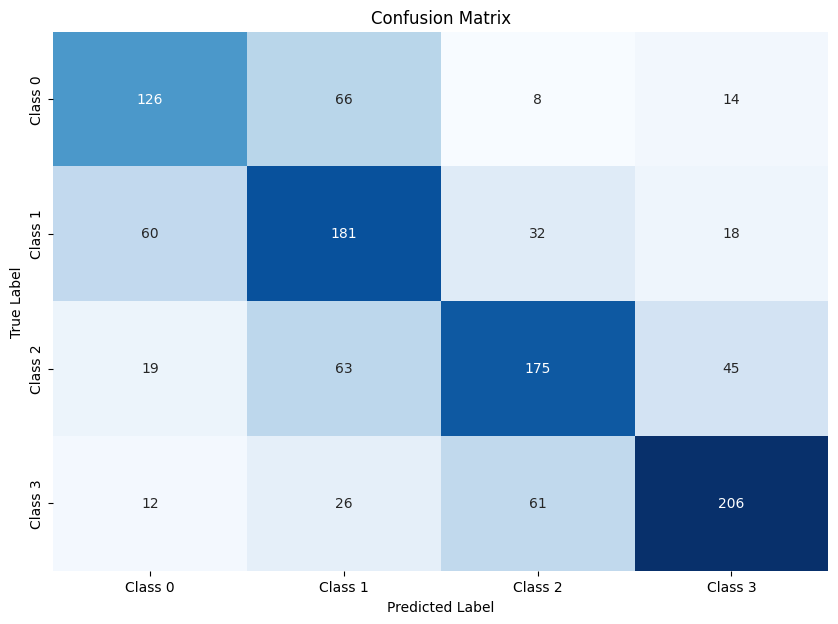

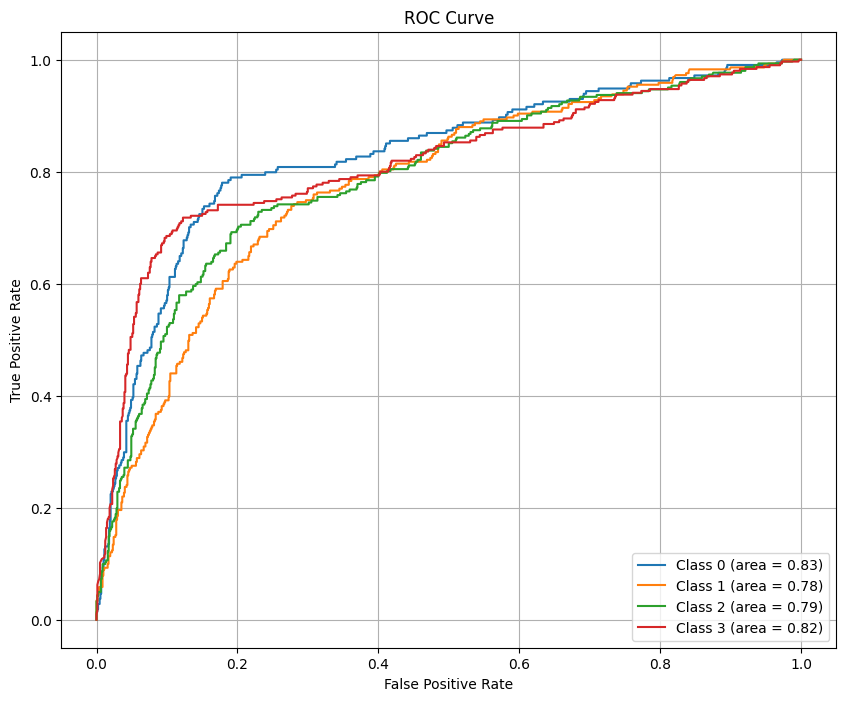

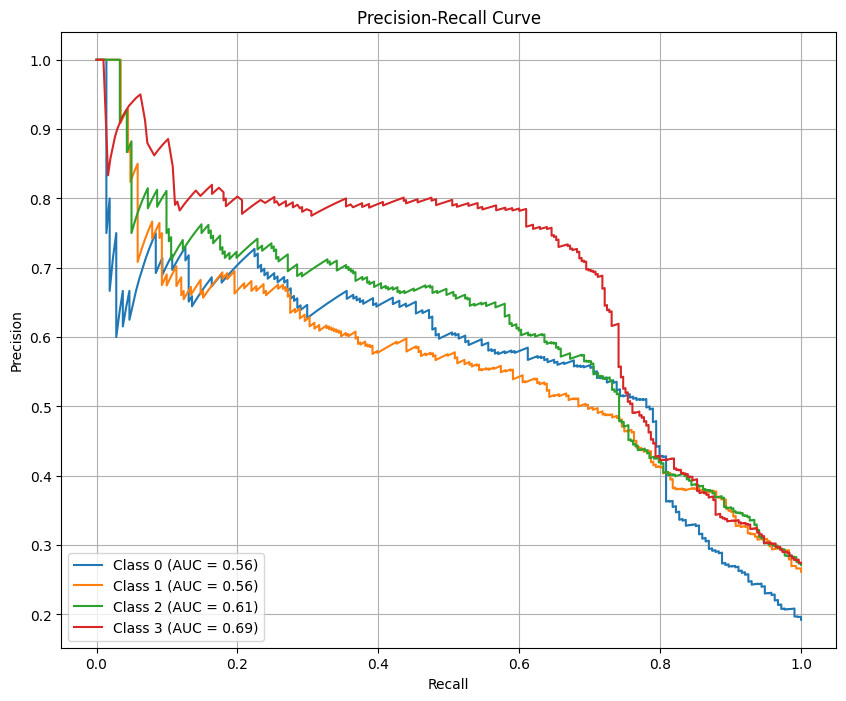

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, roc_curve

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler

import torch
import torch.nn as nn
import torch.nn.functional as F

class ChebyshevKANLayer(nn.Module):
    def __init__(self, input_dim, output_dim, degree, init_method='xavier'):
        super(ChebyshevKANLayer, self).__init__()
        self.inputdim = input_dim
        self.outdim = output_dim
        self.degree = degree

        self.cheby_coeffs = nn.Parameter(torch.empty(input_dim, output_dim, degree + 1))
        self.init_method = init_method
        self.initialize_weights()
        self.register_buffer("arange", torch.arange(0, degree + 1, 1))

    def initialize_weights(self):
        if self.init_method == 'xavier':
            nn.init.xavier_normal_(self.cheby_coeffs)
        elif self.init_method == 'he':
            nn.init.kaiming_normal_(self.cheby_coeffs, nonlinearity='relu')
        elif self.init_method == 'normal':
            nn.init.normal_(self.cheby_coeffs, mean=0.0, std=1.0)
        elif self.init_method == 'uniform':
            nn.init.uniform_(self.cheby_coeffs, a=-0.1, b=0.1)
        elif self.init_method == 'lecun':
            nn.init.kaiming_normal_(self.cheby_coeffs, nonlinearity='linear')
        elif self.init_method == 'orthogonal':
            nn.init.orthogonal_(self.cheby_coeffs)
        else:
            raise ValueError("Unknown initialization method")

    def chebyshev_polynomials(self, x):
        T = [torch.ones_like(x), 2*x]
        for n in range(2, self.degree + 1):
            T.append(2 * x * T[n - 1] - T[n - 2])
        return torch.stack(T, dim=-1)

    def forward(self, x):
        x = x.view(-1, self.inputdim)
        x = torch.tanh(x)
        T = self.chebyshev_polynomials(x)
        y = torch.einsum("bij,ioj->bo", T, self.cheby_coeffs)
        y = y.view(-1, self.outdim)
        return y

class MAEEG(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(MAEEG, self).__init__()

        self.conv1 = nn.Conv1d(in_channels=input_dim, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.dropout1 = nn.Dropout(0.5)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.adaptive_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.conv5 = nn.Conv1d(in_channels=256, out_channels=128, kernel_size=3, stride=1)
        self.global_pool = nn.AdaptiveAvgPool1d(1)

        self.fc0 = ChebyshevKANLayer(input_dim=128, output_dim=512, degree=3)

        self.lstm = nn.LSTM(input_size=512, hidden_size=256, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)

        self.fc1 = ChebyshevKANLayer(input_dim=512, output_dim=64, degree=3)
        self.bn1 = nn.BatchNorm1d(64)
        self.fc2 = ChebyshevKANLayer(input_dim=64, output_dim=num_classes, degree=3)

    def forward(self, x):

        x = F.relu(self.conv1(x))
        x = self.dropout1(x)
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.dropout1(x)
        x = F.relu(self.conv3(x))
        x = self.dropout1(x)

        #x = self.adaptive_pool(x)

        #x = x.squeeze(2)

        x = self.conv5(x)
        x = F.leaky_relu(x)
        x = self.global_pool(x)

        x = x.view(x.size(0), -1)

        x = self.fc0(x)

        x, _ = self.lstm(x)

        #x = x[:, -1, :]

        x = self.fc1(x)
        x = self.bn1(x)
        x = self.fc2(x)
        x = F.softmax(x, dim=1)

        return x


class KARNLayer(nn.Module):
    def __init__(self, in_features, out_features):
        super(KARNLayer, self).__init__()
        self.W = nn.Parameter(torch.randn(out_features, in_features))
        self.b = nn.Parameter(torch.randn(out_features))

    def forward(self, x):
        x = torch.sin(torch.mm(x, self.W.T) + self.b)
        return x




def train_classifier(model, train_loader, optimizer, loss_fn):
    model.train()
    train_loss = 0
    correct_train_preds = 0
    total_train_preds = 0

    for x, y in train_loader:
        optimizer.zero_grad()
        output = model(x)
        loss = loss_fn(output, y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()


        _, predicted = torch.max(output, 1)
        correct_train_preds += (predicted == y).sum().item()
        total_train_preds += y.size(0)

    train_accuracy = correct_train_preds / total_train_preds
    return train_loss / len(train_loader), train_accuracy

def evaluate_classifier(model, loader):
    model.eval()
    all_preds = []
    all_probs = []
    all_labels = []
    with torch.no_grad():
        for x, y in loader:
            output = model(x)
            probs = F.softmax(output, dim=1)
            preds = torch.argmax(output, dim=1)
            all_preds.append(preds)
            all_probs.append(probs)
            all_labels.append(y)
    preds = torch.cat(all_preds)
    probs = torch.cat(all_probs)
    labels = torch.cat(all_labels)
    accuracy = accuracy_score(labels.numpy(), preds.numpy())
    return accuracy, preds, labels, probs



def evaluate_loss(model, loader, loss_fn):
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for x, y in loader:
            output = model(x)
            loss = loss_fn(output, y)
            val_loss += loss.item()
    return val_loss / len(loader)

def plot_stats(train_loss, val_loss, train_accuracy, valid_accuracy, title):
    plt.figure(figsize=(16, 8))
    plt.title(title + ' loss')
    plt.plot(train_loss, label='Train loss')
    plt.plot(val_loss, label='Validation loss')
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(16, 8))
    plt.title(title + ' accuracy')
    plt.plot(train_accuracy, label='Train accuracy')
    plt.plot(valid_accuracy, label='Validation accuracy')
    plt.legend()
    plt.grid()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, num_classes):
    cm = confusion_matrix(y_true, y_pred, labels=range(num_classes))
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=[f'Class {i}' for i in range(num_classes)],
                yticklabels=[f'Class {i}' for i in range(num_classes)])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

def plot_roc_auc_curve(y_true, y_probs, num_classes):
    plt.figure(figsize=(10, 8))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_true == i, y_probs[:, i])
        plt.plot(fpr, tpr, label=f'Class {i} (area = {auc(fpr, tpr):.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

def plot_precision_recall_curve(y_true, y_probs, num_classes):
    plt.figure(figsize=(10, 8))
    for i in range(num_classes):
        precision, recall, _ = precision_recall_curve(y_true == i, y_probs[:, i])
        plt.plot(recall, precision, label=f'Class {i} (AUC = {auc(recall, precision):.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.grid()
    plt.show()

def train_and_evaluate_classifier(df_all_clean_array, df_Y_array, num_classes):
    input_dim = df_all_clean_array.shape[1]  # Update input_dim to 6

    accuracy_train = []
    accuracy_test = []

    val_labels_history = []
    val_preds_history = []
    val_probs_history = []

    train_features, val_features, train_labels, val_labels = train_test_split(df_all_clean_array, df_Y_array, test_size=0.2, random_state=42)

    train_accuracy_history = []
    valid_accuracy_history = []

    train_loss_history = []
    valid_loss_history = []

    scaler = StandardScaler()
    train_features = scaler.fit_transform(train_features.reshape(-1, train_features.shape[-1])).reshape(train_features.shape)
    val_features = scaler.transform(val_features.reshape(-1, val_features.shape[-1])).reshape(val_features.shape)

    train_features = torch.tensor(train_features, dtype=torch.float32)
    val_features = torch.tensor(val_features, dtype=torch.float32)
    train_labels = torch.tensor(train_labels, dtype=torch.long)
    val_labels = torch.tensor(val_labels, dtype=torch.long)


    class_counts = torch.bincount(train_labels)
    class_weights = 1. / class_counts.float()
    sample_weights = class_weights[train_labels]


    sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

    train_loader = DataLoader(TensorDataset(train_features, train_labels), batch_size=128, sampler=sampler)
    val_loader = DataLoader(TensorDataset(val_features, val_labels), batch_size=128, shuffle=False)

    model = MAEEG(input_dim, num_classes)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    loss_fn = nn.CrossEntropyLoss()

    for epoch in range(900):
        train_loss, train_accuracy = train_classifier(model, train_loader, optimizer, loss_fn)
        train_loss_history.append(train_loss)
        val_loss = evaluate_loss(model, val_loader, loss_fn)
        valid_loss_history.append(val_loss)
        val_accuracy, val_preds, val_labels, val_probs = evaluate_classifier(model, val_loader)
        valid_accuracy_history.append(val_accuracy)
        train_accuracy_history.append(train_accuracy)
        print(f'Epoch {epoch}: Train loss {train_loss}, Val loss {val_loss}, Train accuracy {train_accuracy}, Val accuracy {val_accuracy}')

    accuracy_train.append(evaluate_classifier(model, train_loader))
    accuracy_test.append(evaluate_classifier(model, val_loader))

    plot_stats(train_loss_history, valid_loss_history, train_accuracy_history, valid_accuracy_history, 'Classifier model')


    val_labels_np = val_labels.numpy()
    val_preds_np = val_preds.numpy()
    val_probs_np = val_probs.numpy()


    val_labels_history = np.concatenate((val_labels_history, val_labels_np), axis=0) if len(val_labels_history) > 0 else val_labels_np
    val_preds_history = np.concatenate((val_preds_history, val_preds_np), axis=0) if len(val_preds_history) > 0 else val_preds_np
    val_probs_history = np.concatenate((val_probs_history, val_probs_np), axis=0) if len(val_probs_history) > 0 else val_probs_np

    plot_confusion_matrix(val_labels_np, val_preds_np, num_classes)

    plot_confusion_matrix(val_labels_history, val_preds_history, num_classes)
    plot_roc_auc_curve(val_labels_history, val_probs_history, num_classes)
    plot_precision_recall_curve(val_labels_history, val_probs_history, num_classes)

    return accuracy_train, accuracy_test




accuracy_train, accuracy_test = train_and_evaluate_classifier(df_all_clean_array_old, df_Y_array_old,  num_classes=4)

CONVx3 + ChebyshevKANLayer + LSTM + ChebyshevKANLayer * 2 (Обучаем обработанные данные)

Epoch 0: Train loss 1.4244272708892822, Val loss 1.4318051849092757, Train accuracy 0.25167410714285715, Val accuracy 0.24441964285714285
Epoch 1: Train loss 1.420278502362115, Val loss 1.363540802683149, Train accuracy 0.2603236607142857, Val accuracy 0.3125
Epoch 2: Train loss 1.372487872838974, Val loss 1.3603552750178747, Train accuracy 0.32896205357142855, Val accuracy 0.33816964285714285
Epoch 3: Train loss 1.36361682840756, Val loss 1.35995238167899, Train accuracy 0.34375, Val accuracy 0.35379464285714285
Epoch 4: Train loss 1.3637204681124007, Val loss 1.3513872964041573, Train accuracy 0.33231026785714285, Val accuracy 0.33816964285714285
Epoch 5: Train loss 1.3601862915924616, Val loss 1.338103038924081, Train accuracy 0.3314732142857143, Val accuracy 0.35267857142857145
Epoch 6: Train loss 1.3546804274831499, Val loss 1.3467723642076765, Train accuracy 0.34598214285714285, Val accuracy 0.35825892857142855
Epoch 7: Train loss 1.3660637864044733, Val loss 1.3533399956566947, 

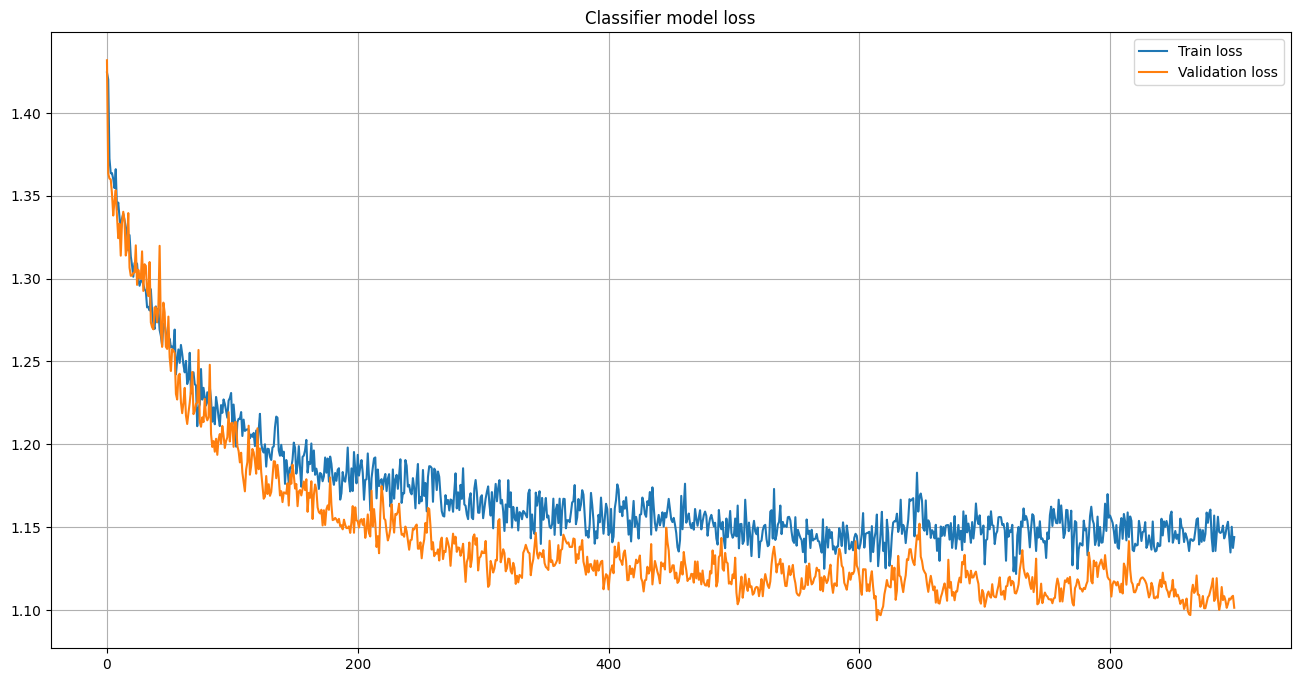

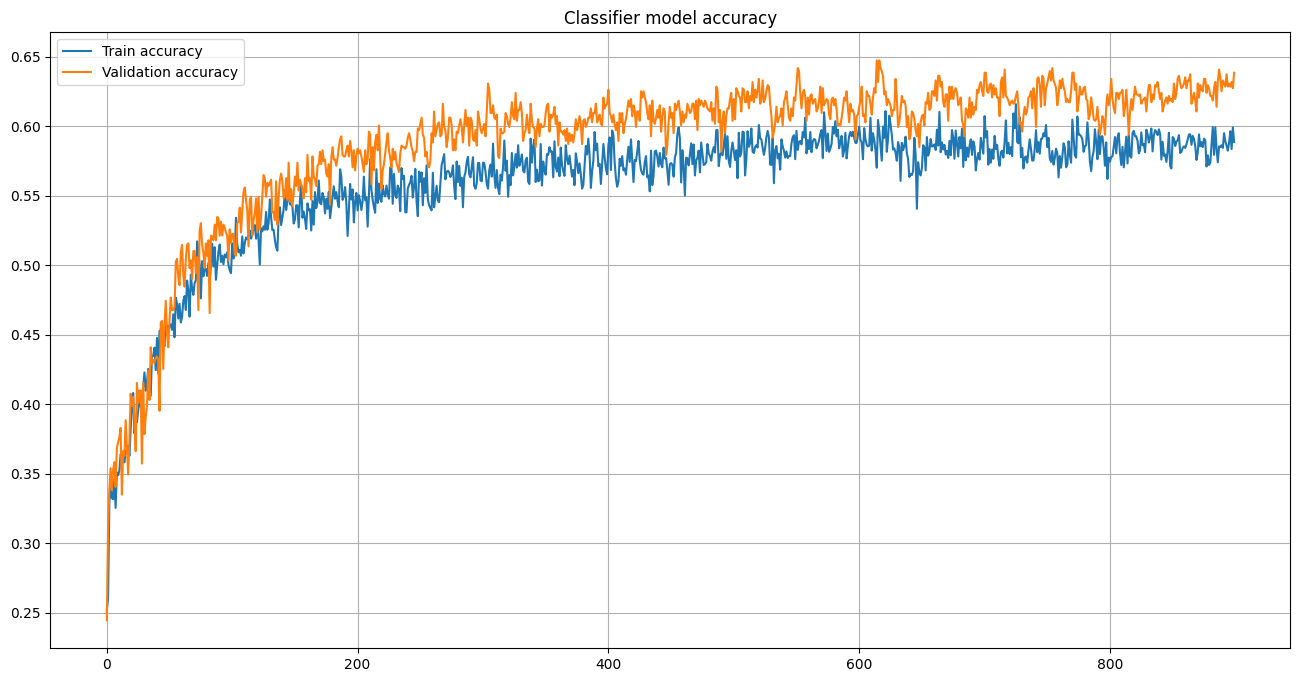

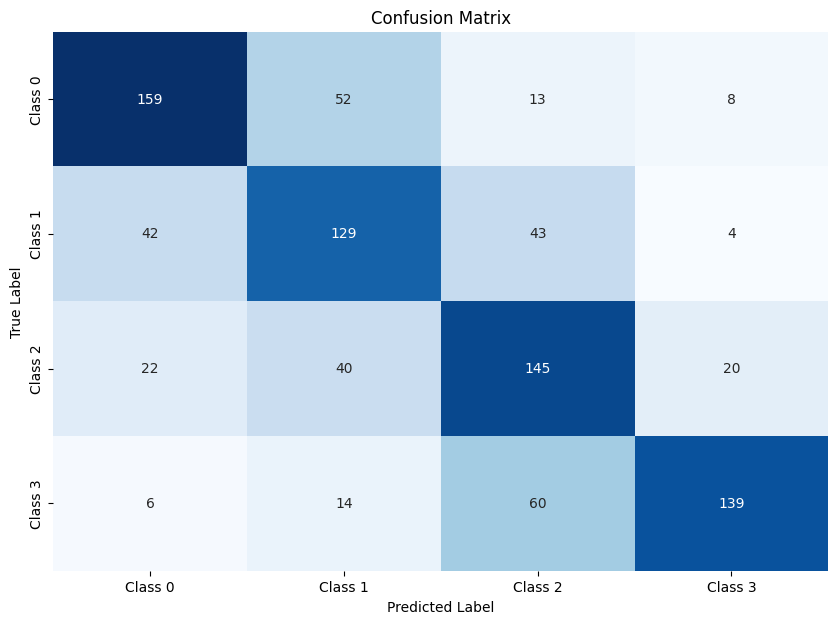

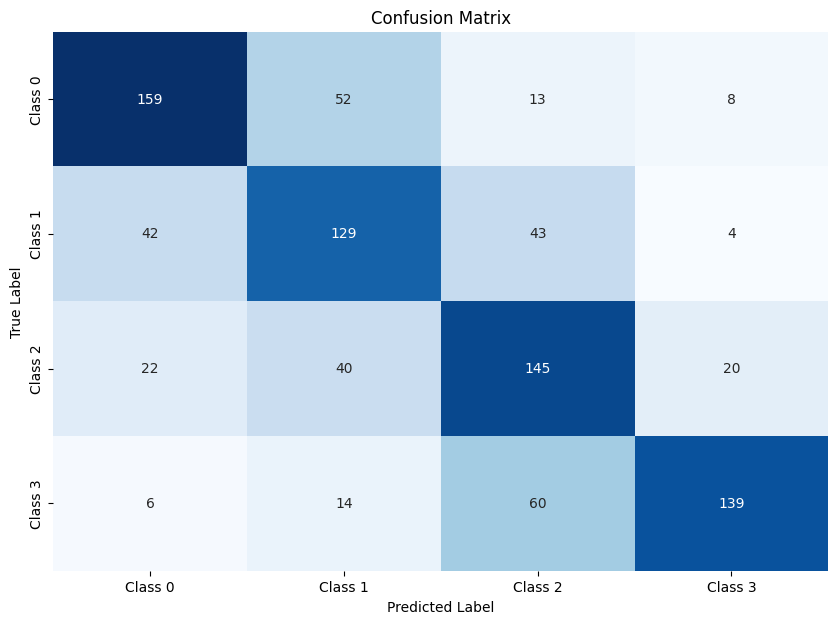

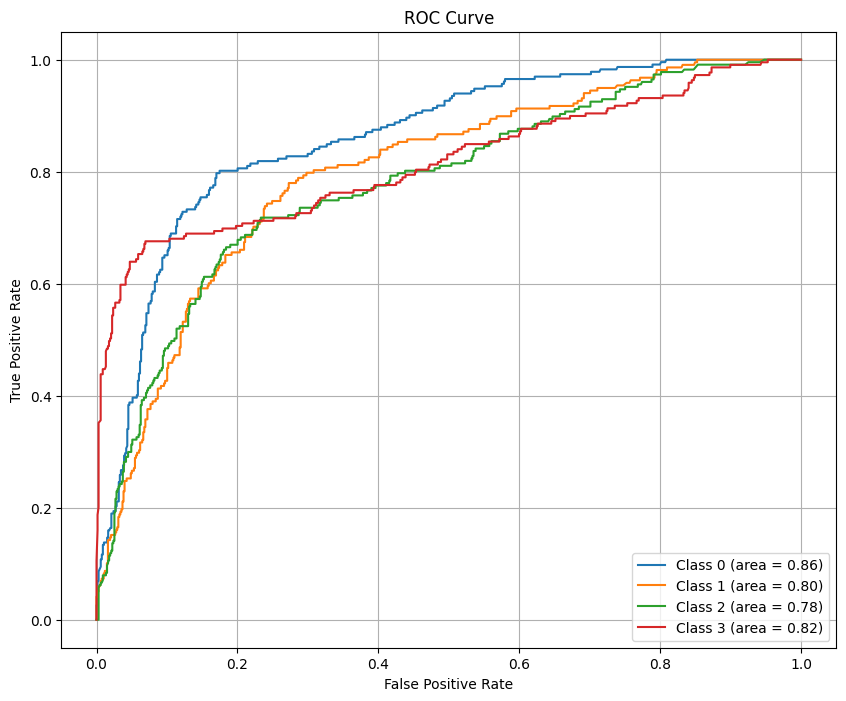

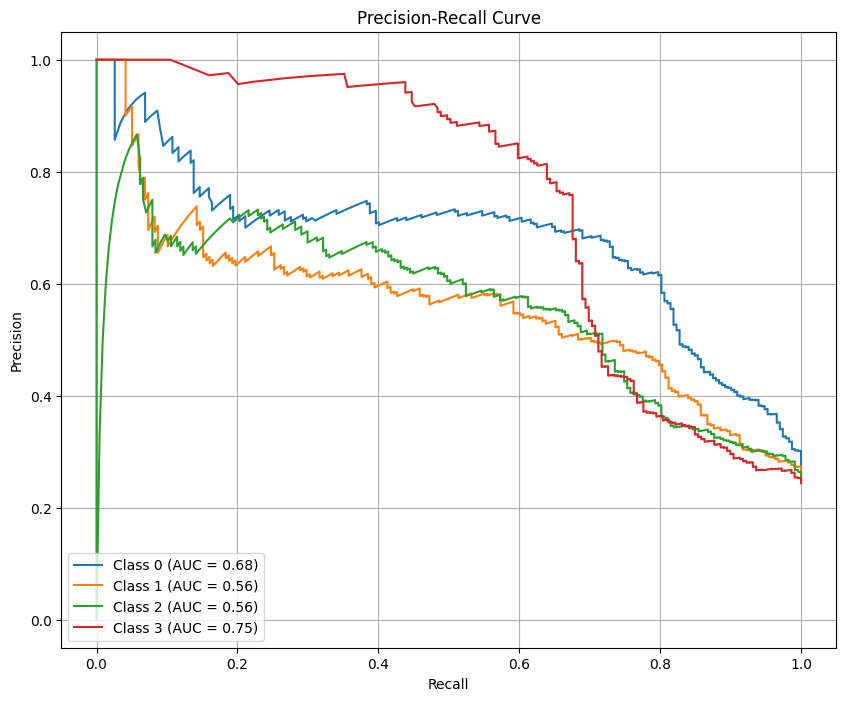

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, roc_curve

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler

import torch
import torch.nn as nn
import torch.nn.functional as F

class ChebyshevKANLayer(nn.Module):
    def __init__(self, input_dim, output_dim, degree, init_method='xavier'):
        super(ChebyshevKANLayer, self).__init__()
        self.inputdim = input_dim
        self.outdim = output_dim
        self.degree = degree

        self.cheby_coeffs = nn.Parameter(torch.empty(input_dim, output_dim, degree + 1))
        self.init_method = init_method
        self.initialize_weights()
        self.register_buffer("arange", torch.arange(0, degree + 1, 1))

    def initialize_weights(self):
        if self.init_method == 'xavier':
            nn.init.xavier_normal_(self.cheby_coeffs)
        elif self.init_method == 'he':
            nn.init.kaiming_normal_(self.cheby_coeffs, nonlinearity='relu')
        elif self.init_method == 'normal':
            nn.init.normal_(self.cheby_coeffs, mean=0.0, std=1.0)
        elif self.init_method == 'uniform':
            nn.init.uniform_(self.cheby_coeffs, a=-0.1, b=0.1)
        elif self.init_method == 'lecun':
            nn.init.kaiming_normal_(self.cheby_coeffs, nonlinearity='linear')
        elif self.init_method == 'orthogonal':
            nn.init.orthogonal_(self.cheby_coeffs)
        else:
            raise ValueError("Unknown initialization method")

    def chebyshev_polynomials(self, x):
        T = [torch.ones_like(x), 2*x]
        for n in range(2, self.degree + 1):
            T.append(2 * x * T[n - 1] - T[n - 2])
        return torch.stack(T, dim=-1)

    def forward(self, x):
        x = x.view(-1, self.inputdim)
        x = torch.tanh(x)
        T = self.chebyshev_polynomials(x)
        y = torch.einsum("bij,ioj->bo", T, self.cheby_coeffs)
        y = y.view(-1, self.outdim)
        return y

class MAEEG(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(MAEEG, self).__init__()

        self.conv1 = nn.Conv1d(in_channels=input_dim, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.dropout1 = nn.Dropout(0.5)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.adaptive_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.conv5 = nn.Conv1d(in_channels=256, out_channels=128, kernel_size=3, stride=1)
        self.global_pool = nn.AdaptiveAvgPool1d(1)

        self.fc0 = ChebyshevKANLayer(input_dim=128, output_dim=512, degree=3)

        self.lstm = nn.LSTM(input_size=512, hidden_size=256, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)

        self.fc1 = ChebyshevKANLayer(input_dim=512, output_dim=64, degree=3)
        self.bn1 = nn.BatchNorm1d(64)
        self.fc2 = ChebyshevKANLayer(input_dim=64, output_dim=num_classes, degree=3)

    def forward(self, x):

        x = F.relu(self.conv1(x))
        x = self.dropout1(x)
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.dropout1(x)
        x = F.relu(self.conv3(x))
        x = self.dropout1(x)

        #x = self.adaptive_pool(x)

        #x = x.squeeze(2)

        x = self.conv5(x)
        x = F.leaky_relu(x)
        x = self.global_pool(x)

        x = x.view(x.size(0), -1)

        x = self.fc0(x)

        x, _ = self.lstm(x)

        #x = x[:, -1, :]

        x = self.fc1(x)
        x = self.bn1(x)
        x = self.fc2(x)
        x = F.softmax(x, dim=1)

        return x


class KARNLayer(nn.Module):
    def __init__(self, in_features, out_features):
        super(KARNLayer, self).__init__()
        self.W = nn.Parameter(torch.randn(out_features, in_features))
        self.b = nn.Parameter(torch.randn(out_features))

    def forward(self, x):
        x = torch.sin(torch.mm(x, self.W.T) + self.b)
        return x




def train_classifier(model, train_loader, optimizer, loss_fn):
    model.train()
    train_loss = 0
    correct_train_preds = 0
    total_train_preds = 0

    for x, y in train_loader:
        optimizer.zero_grad()
        output = model(x)
        loss = loss_fn(output, y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()


        _, predicted = torch.max(output, 1)
        correct_train_preds += (predicted == y).sum().item()
        total_train_preds += y.size(0)

    train_accuracy = correct_train_preds / total_train_preds
    return train_loss / len(train_loader), train_accuracy

def evaluate_classifier(model, loader):
    model.eval()
    all_preds = []
    all_probs = []
    all_labels = []
    with torch.no_grad():
        for x, y in loader:
            output = model(x)
            probs = F.softmax(output, dim=1)
            preds = torch.argmax(output, dim=1)
            all_preds.append(preds)
            all_probs.append(probs)
            all_labels.append(y)
    preds = torch.cat(all_preds)
    probs = torch.cat(all_probs)
    labels = torch.cat(all_labels)
    accuracy = accuracy_score(labels.numpy(), preds.numpy())
    return accuracy, preds, labels, probs



def evaluate_loss(model, loader, loss_fn):
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for x, y in loader:
            output = model(x)
            loss = loss_fn(output, y)
            val_loss += loss.item()
    return val_loss / len(loader)

def plot_stats(train_loss, val_loss, train_accuracy, valid_accuracy, title):
    plt.figure(figsize=(16, 8))
    plt.title(title + ' loss')
    plt.plot(train_loss, label='Train loss')
    plt.plot(val_loss, label='Validation loss')
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(16, 8))
    plt.title(title + ' accuracy')
    plt.plot(train_accuracy, label='Train accuracy')
    plt.plot(valid_accuracy, label='Validation accuracy')
    plt.legend()
    plt.grid()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, num_classes):
    cm = confusion_matrix(y_true, y_pred, labels=range(num_classes))
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=[f'Class {i}' for i in range(num_classes)],
                yticklabels=[f'Class {i}' for i in range(num_classes)])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

def plot_roc_auc_curve(y_true, y_probs, num_classes):
    plt.figure(figsize=(10, 8))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_true == i, y_probs[:, i])
        plt.plot(fpr, tpr, label=f'Class {i} (area = {auc(fpr, tpr):.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

def plot_precision_recall_curve(y_true, y_probs, num_classes):
    plt.figure(figsize=(10, 8))
    for i in range(num_classes):
        precision, recall, _ = precision_recall_curve(y_true == i, y_probs[:, i])
        plt.plot(recall, precision, label=f'Class {i} (AUC = {auc(recall, precision):.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.grid()
    plt.show()

def train_and_evaluate_classifier(df_all_clean_array, df_Y_array, num_classes):
    input_dim = df_all_clean_array.shape[1]  # Update input_dim to 6

    accuracy_train = []
    accuracy_test = []

    val_labels_history = []
    val_preds_history = []
    val_probs_history = []

    train_features, val_features, train_labels, val_labels = train_test_split(df_all_clean_array, df_Y_array, test_size=0.2, random_state=42)

    train_accuracy_history = []
    valid_accuracy_history = []

    train_loss_history = []
    valid_loss_history = []

    scaler = StandardScaler()
    train_features = scaler.fit_transform(train_features.reshape(-1, train_features.shape[-1])).reshape(train_features.shape)
    val_features = scaler.transform(val_features.reshape(-1, val_features.shape[-1])).reshape(val_features.shape)

    train_features = torch.tensor(train_features, dtype=torch.float32)
    val_features = torch.tensor(val_features, dtype=torch.float32)
    train_labels = torch.tensor(train_labels, dtype=torch.long)
    val_labels = torch.tensor(val_labels, dtype=torch.long)


    class_counts = torch.bincount(train_labels)
    class_weights = 1. / class_counts.float()
    sample_weights = class_weights[train_labels]


    sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

    train_loader = DataLoader(TensorDataset(train_features, train_labels), batch_size=128, sampler=sampler)
    val_loader = DataLoader(TensorDataset(val_features, val_labels), batch_size=128, shuffle=False)

    model = MAEEG(input_dim, num_classes)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    loss_fn = nn.CrossEntropyLoss()

    for epoch in range(900):
        train_loss, train_accuracy = train_classifier(model, train_loader, optimizer, loss_fn)
        train_loss_history.append(train_loss)
        val_loss = evaluate_loss(model, val_loader, loss_fn)
        valid_loss_history.append(val_loss)
        val_accuracy, val_preds, val_labels, val_probs = evaluate_classifier(model, val_loader)
        valid_accuracy_history.append(val_accuracy)
        train_accuracy_history.append(train_accuracy)
        print(f'Epoch {epoch}: Train loss {train_loss}, Val loss {val_loss}, Train accuracy {train_accuracy}, Val accuracy {val_accuracy}')

    accuracy_train.append(evaluate_classifier(model, train_loader))
    accuracy_test.append(evaluate_classifier(model, val_loader))

    plot_stats(train_loss_history, valid_loss_history, train_accuracy_history, valid_accuracy_history, 'Classifier model')


    val_labels_np = val_labels.numpy()
    val_preds_np = val_preds.numpy()
    val_probs_np = val_probs.numpy()


    val_labels_history = np.concatenate((val_labels_history, val_labels_np), axis=0) if len(val_labels_history) > 0 else val_labels_np
    val_preds_history = np.concatenate((val_preds_history, val_preds_np), axis=0) if len(val_preds_history) > 0 else val_preds_np
    val_probs_history = np.concatenate((val_probs_history, val_probs_np), axis=0) if len(val_probs_history) > 0 else val_probs_np

    plot_confusion_matrix(val_labels_np, val_preds_np, num_classes)

    plot_confusion_matrix(val_labels_history, val_preds_history, num_classes)
    plot_roc_auc_curve(val_labels_history, val_probs_history, num_classes)
    plot_precision_recall_curve(val_labels_history, val_probs_history, num_classes)

    return accuracy_train, accuracy_test




accuracy_train, accuracy_test = train_and_evaluate_classifier(balanced_df_all_clean_array_old, balanced_df_Y_array_old,  num_classes=4)

CONVx3 + LinerLayer + TimeSeriesKAN + LinerLayer * 2 (Обучаем обработанные данные)

In [ ]:
import torch
import torch.nn.functional as F
import torch.optim as optim

class SplineLinearLayer(torch.nn.Module):
    def __init__(self, input_dim, output_dim, num_knots=5, spline_order=3,
                 noise_scale=0.1, base_scale=1.0, spline_scale=1.0,
                 activation=torch.nn.SiLU, grid_epsilon=0.02, grid_range=[-1, 1],
                 standalone_spline_scaling=True):
        super(SplineLinearLayer, self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.num_knots = num_knots
        self.spline_order = spline_order
        self.grid_epsilon = grid_epsilon
        self.grid_range = grid_range
        self.standalone_spline_scaling = standalone_spline_scaling

        self.knots = self._calculate_knots(grid_range, num_knots, spline_order)
        self.base_weights = torch.nn.Parameter(torch.Tensor(output_dim, input_dim))
        self.spline_weights = torch.nn.Parameter(torch.Tensor(output_dim, input_dim, num_knots + spline_order))
        if standalone_spline_scaling:
            self.spline_scales = torch.nn.Parameter(torch.Tensor(output_dim, input_dim))

        self.noise_scale = noise_scale
        self.base_scale = base_scale
        self.spline_scale = spline_scale
        self.activation = activation()

        self._initialize_parameters()

    def _initialize_parameters(self):
        torch.nn.init.xavier_uniform_(self.base_weights, gain=torch.sqrt(torch.tensor(2.0)))
        noise = torch.rand(self.num_knots + 1, self.input_dim, self.output_dim) - 0.5
        self.spline_weights.data.copy_(self.spline_scale * self._initialize_spline_weights(noise))
        if self.standalone_spline_scaling:
            torch.nn.init.xavier_uniform_(self.spline_scales, gain=torch.sqrt(torch.tensor(2.0)))

    def _calculate_knots(self, grid_range, num_knots, spline_order):
        h = (grid_range[1] - grid_range[0]) / num_knots
        knots = torch.arange(-spline_order, num_knots + spline_order + 1) * h + grid_range[0]
        return knots.expand(self.input_dim, -1).contiguous()

    def _initialize_spline_weights(self, noise):
        return self._fit_curve_to_coefficients(self.knots.T[self.spline_order : -self.spline_order], noise)

    def _compute_b_splines(self, x):
        x = x.unsqueeze(-1)
        bases = ((x >= self.knots[:, :-1]) & (x < self.knots[:, 1:])).to(x.dtype)
        for k in range(1, self.spline_order + 1):
            bases = ((x - self.knots[:, : -(k + 1)]) / (self.knots[:, k:-1] - self.knots[:, : -(k + 1)]) * bases[:, :, :-1] +
                     (self.knots[:, k + 1 :] - x) / (self.knots[:, k + 1 :] - self.knots[:, 1:(-k)]) * bases[:, :, 1:])
        return bases.contiguous()

    def _fit_curve_to_coefficients(self, x, y):
        A = self._compute_b_splines(x).transpose(0, 1)
        B = y.transpose(0, 1)
        solution = torch.linalg.lstsq(A, B).solution
        return solution.permute(2, 0, 1).contiguous()

    @property
    def _scaled_spline_weights(self):
        return self.spline_weights * (self.spline_scales.unsqueeze(-1) if self.standalone_spline_scaling else 1.0)

    def forward(self, x):
        base_output = F.linear(self.activation(x), self.base_weights)
        spline_output = F.linear(self._compute_b_splines(x).view(x.size(0), -1),
                                 self._scaled_spline_weights.view(self.output_dim, -1))
        return base_output + spline_output

    @torch.no_grad()
    def _update_knots(self, x, margin=0.01):
        batch = x.size(0)
        splines = self._compute_b_splines(x).permute(1, 0, 2)
        orig_coeff = self._scaled_spline_weights.permute(1, 2, 0)
        unreduced_spline_output = torch.bmm(splines, orig_coeff).permute(1, 0, 2)

        x_sorted = torch.sort(x, dim=0)[0]
        adaptive_knots = x_sorted[torch.linspace(0, batch - 1, self.num_knots + 1, dtype=torch.int64, device=x.device)]

        uniform_step = (x_sorted[-1] - x_sorted[0] + 2 * margin) / self.num_knots
        uniform_knots = torch.arange(self.num_knots + 1, dtype=torch.float32, device=x.device).unsqueeze(1) * uniform_step + x_sorted[0] - margin

        knots = self.grid_epsilon * uniform_knots + (1 - self.grid_epsilon) * adaptive_knots
        knots = torch.cat([
            knots[:1] - uniform_step * torch.arange(self.spline_order, 0, -1, device=x.device).unsqueeze(1),
            knots,
            knots[-1:] + uniform_step * torch.arange(1, self.spline_order + 1, device=x.device).unsqueeze(1),
        ], dim=0)

        self.knots.copy_(knots.T)
        self.spline_weights.data.copy_(self._fit_curve_to_coefficients(x, unreduced_spline_output))




class DeepKAN(torch.nn.Module):
    """
    Initializes the DeepKAN.

    Args:
        input_dim (int): Dimensionality of input data.
        hidden_layers (list): List of hidden layer dimensions (The last one should the target layer)
        num_knots (int): Number of knots for the spline.
        spline_order (int): Order of the spline.
        noise_scale (float): Scale of the noise.
        base_scale (float): Scale of the base weights.
        spline_scale (float): Scale of the spline weights.
        activation (torch.nn.Module): Activation function to use.
        grid_epsilon (float): Epsilon value for the grid.
        grid_range (list): Range of the grid.
    """
    def __init__(self, input_dim, hidden_layers, num_knots=5, spline_order=3,
                 noise_scale=0.1, base_scale=1.0, spline_scale=1.0,
                 activation=torch.nn.SiLU, grid_epsilon=0.02, grid_range=[-1, 1]):
        super(DeepKAN, self).__init__()
        layers = [input_dim] + hidden_layers
        self.layers = torch.nn.ModuleList()
        for in_dim, out_dim in zip(layers, layers[1:]):
            self.layers.append(SplineLinearLayer(in_dim, out_dim, num_knots, spline_order,
                                                 noise_scale, base_scale, spline_scale,
                                                 activation, grid_epsilon, grid_range))

    def forward(self, x, update_knots=False):
        """
        Forward pass of the DeepKAN.

        Args:
            x (torch.Tensor): Input tensor.
            update_knots (bool): Whether to update knots during forward pass.

        Returns:
            torch.Tensor: Output tensor.
        """
        for layer in self.layers:
            if update_knots:
                layer._update_knots(x)
            x = layer(x)
        return x

    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        """
        Computes the regularization loss of the DeepKAN.

        Args:
            regularize_activation (float): Regularization strength for activation.
            regularize_entropy (float): Regularization strength for entropy.

        Returns:
            torch.Tensor: Regularization loss.
        """
        return sum(layer._regularization_loss(regularize_activation, regularize_entropy) for layer in self.layers)



Epoch 0: Train loss 1.3669519594737463, Val loss 1.3511640684945243, Train accuracy 0.30552455357142855, Val accuracy 0.3247767857142857
Epoch 1: Train loss 1.3317467187132155, Val loss 1.3087258168629237, Train accuracy 0.34737723214285715, Val accuracy 0.3861607142857143
Epoch 2: Train loss 1.316816862140383, Val loss 1.2944526672363281, Train accuracy 0.38560267857142855, Val accuracy 0.4263392857142857
Epoch 3: Train loss 1.3057275371892112, Val loss 1.2992445400782995, Train accuracy 0.39760044642857145, Val accuracy 0.39620535714285715
Epoch 4: Train loss 1.3008843490055628, Val loss 1.292277523449489, Train accuracy 0.40150669642857145, Val accuracy 0.41629464285714285
Epoch 5: Train loss 1.2881888576916285, Val loss 1.285323211124965, Train accuracy 0.42215401785714285, Val accuracy 0.4296875
Epoch 6: Train loss 1.2904156957353865, Val loss 1.2695593323026384, Train accuracy 0.42410714285714285, Val accuracy 0.44754464285714285
Epoch 7: Train loss 1.275185866015298, Val loss 1.

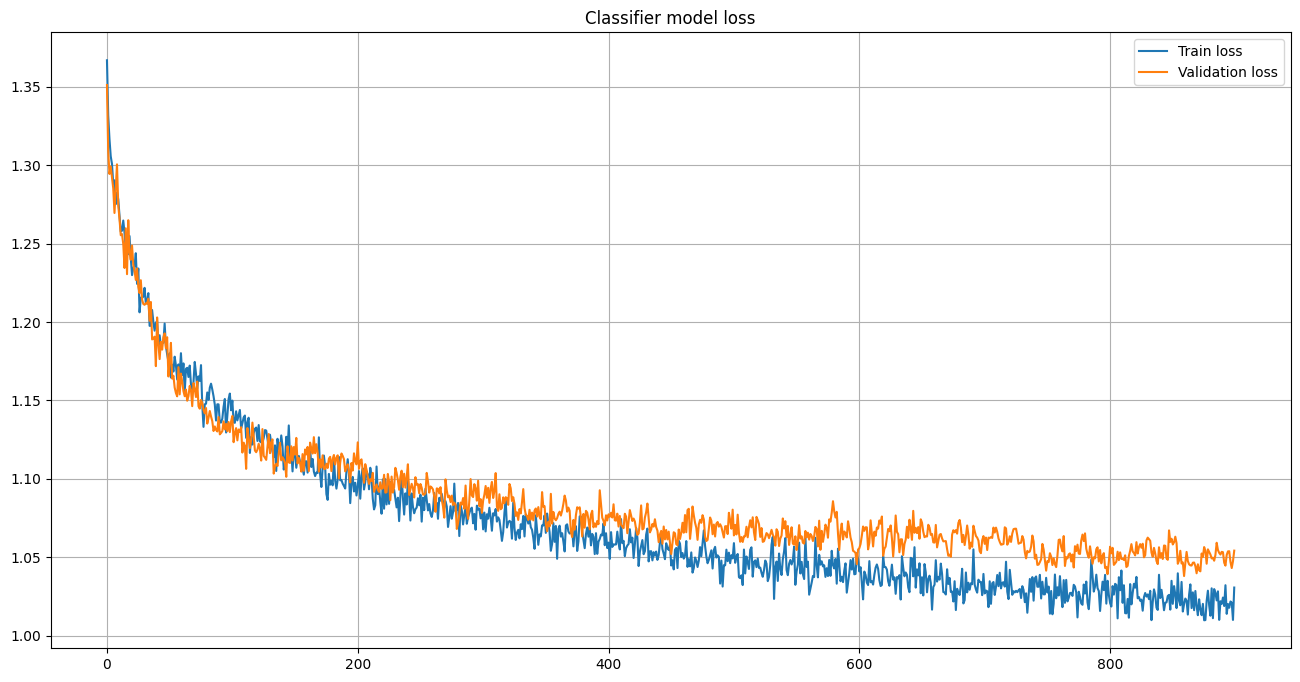

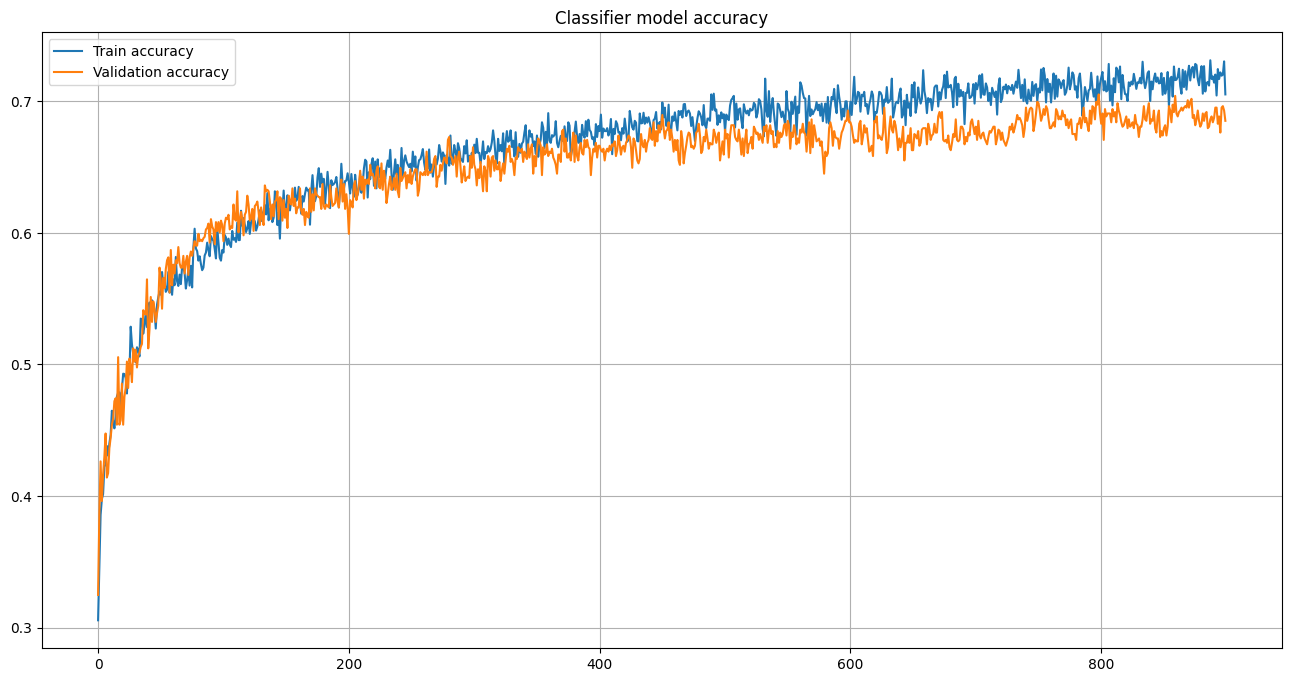

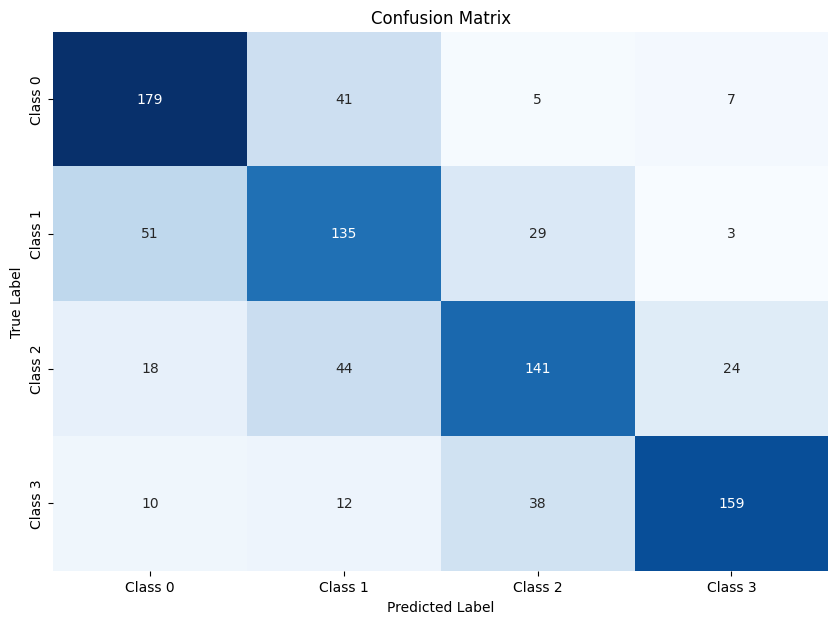

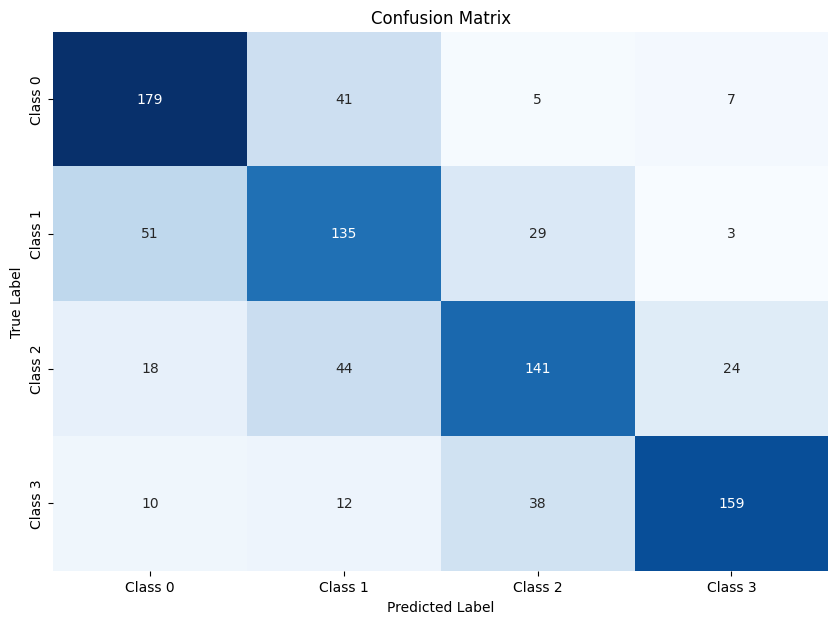

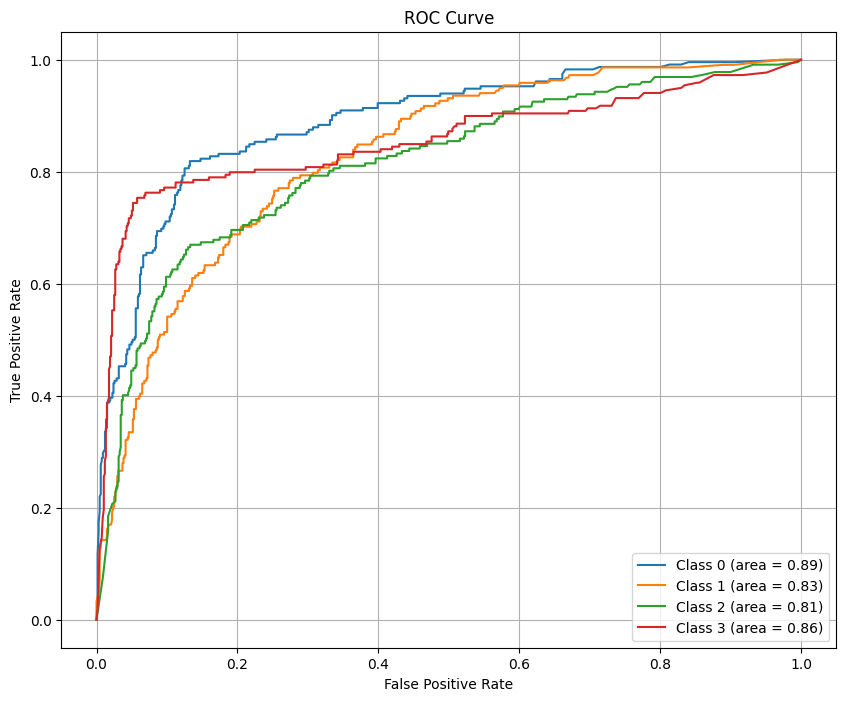

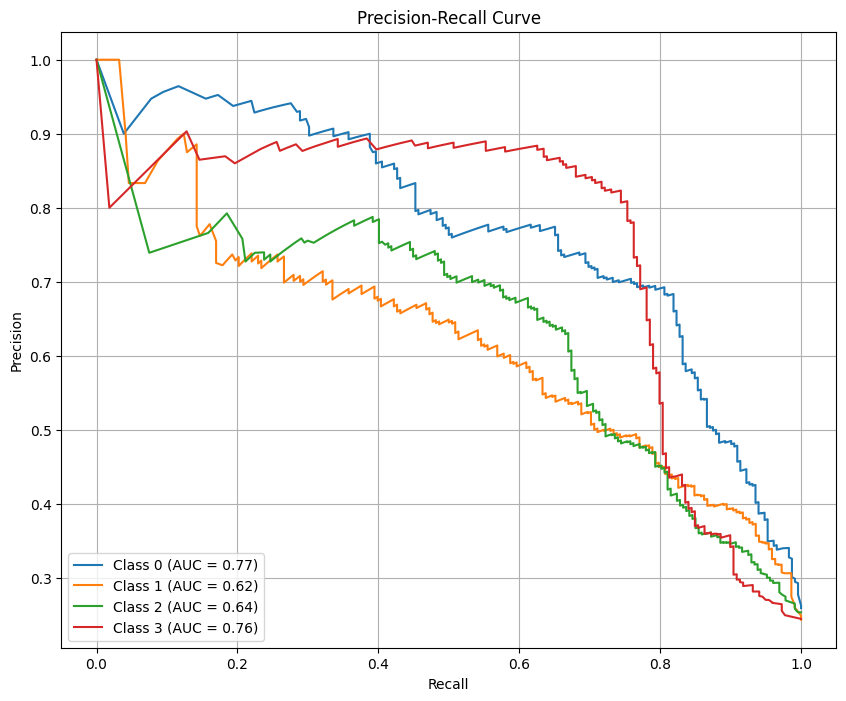

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, roc_curve

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler

import torch
import torch.nn as nn
import torch.nn.functional as F


class KANTimeSeries(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, num_knots=5, spline_order=3,
                 noise_scale=0.1, base_scale=1.0, spline_scale=1.0,
                 activation=nn.SiLU, grid_epsilon=0.02, grid_range=[-1, 1]):
        super(KANTimeSeries, self).__init__()
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size

        self.layers = nn.ModuleList()
        prev_size = input_size
        for hidden_size in hidden_sizes:
            self.layers.append(SplineLinearLayer(prev_size, hidden_size, num_knots, spline_order,
                                                 noise_scale, base_scale, spline_scale,
                                                 activation, grid_epsilon, grid_range))
            prev_size = hidden_size

        self.output_layer = SplineLinearLayer(prev_size, output_size, num_knots, spline_order,
                                              noise_scale, base_scale, spline_scale,
                                              activation, grid_epsilon, grid_range)

    def forward(self, x, update_knots=False):
        for layer in self.layers:
            if update_knots:
                layer._update_knots(x)
            x = layer(x)

        if update_knots:
            self.output_layer._update_knots(x)
        x = self.output_layer(x)
        return x

    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        loss = 0
        for layer in self.layers:
            loss += layer._regularization_loss(regularize_activation, regularize_entropy)
        loss += self.output_layer._regularization_loss(regularize_activation, regularize_entropy)
        return loss

class ChebyshevKANLayer(nn.Module):
    def __init__(self, input_dim, output_dim, degree, init_method='xavier'):
        super(ChebyshevKANLayer, self).__init__()
        self.inputdim = input_dim
        self.outdim = output_dim
        self.degree = degree

        self.cheby_coeffs = nn.Parameter(torch.empty(input_dim, output_dim, degree + 1))
        self.init_method = init_method
        self.initialize_weights()
        self.register_buffer("arange", torch.arange(0, degree + 1, 1))

    def initialize_weights(self):
        if self.init_method == 'xavier':
            nn.init.xavier_normal_(self.cheby_coeffs)
        elif self.init_method == 'he':
            nn.init.kaiming_normal_(self.cheby_coeffs, nonlinearity='relu')
        elif self.init_method == 'normal':
            nn.init.normal_(self.cheby_coeffs, mean=0.0, std=1.0)
        elif self.init_method == 'uniform':
            nn.init.uniform_(self.cheby_coeffs, a=-0.1, b=0.1)
        elif self.init_method == 'lecun':
            nn.init.kaiming_normal_(self.cheby_coeffs, nonlinearity='linear')
        elif self.init_method == 'orthogonal':
            nn.init.orthogonal_(self.cheby_coeffs)
        else:
            raise ValueError("Unknown initialization method")

    def chebyshev_polynomials(self, x):
        T = [torch.ones_like(x), 2*x]
        for n in range(2, self.degree + 1):
            T.append(2 * x * T[n - 1] - T[n - 2])
        return torch.stack(T, dim=-1)

    def forward(self, x):
        x = x.view(-1, self.inputdim)
        x = torch.tanh(x)
        T = self.chebyshev_polynomials(x)
        y = torch.einsum("bij,ioj->bo", T, self.cheby_coeffs)
        y = y.view(-1, self.outdim)
        return y

class MAEEG(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(MAEEG, self).__init__()

        self.conv1 = nn.Conv1d(in_channels=input_dim, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.dropout1 = nn.Dropout(0.5)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.adaptive_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.conv5 = nn.Conv1d(in_channels=256, out_channels=128, kernel_size=3, stride=1)
        self.global_pool = nn.AdaptiveAvgPool1d(1)

        self.fc0 = nn.Linear(in_features=128, out_features=512)

        self.kan = KANTimeSeries(input_size=512, hidden_sizes=[256], output_size=256)

        self.fc1 = nn.Linear(in_features=256, out_features=64)
        self.bn1 = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(in_features=64, out_features=num_classes)

    def forward(self, x):

        x = F.relu(self.conv1(x))
        x = self.dropout1(x)
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.dropout1(x)
        x = F.relu(self.conv3(x))
        x = self.dropout1(x)

        #x = self.adaptive_pool(x)

        #x = x.squeeze(2)

        x = self.conv5(x)
        x = F.leaky_relu(x)
        x = self.global_pool(x)

        x = x.view(x.size(0), -1)

        x = self.fc0(x)

        x = self.kan(x)

        #x = x[:, -1, :]

        x = self.fc1(x)
        x = self.bn1(x)
        x = self.fc2(x)
        x = F.softmax(x, dim=1)

        return x






def train_classifier(model, train_loader, optimizer, loss_fn):
    model.train()
    train_loss = 0
    correct_train_preds = 0
    total_train_preds = 0

    for x, y in train_loader:
        optimizer.zero_grad()
        output = model(x)
        loss = loss_fn(output, y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()


        _, predicted = torch.max(output, 1)
        correct_train_preds += (predicted == y).sum().item()
        total_train_preds += y.size(0)

    train_accuracy = correct_train_preds / total_train_preds
    return train_loss / len(train_loader), train_accuracy

def evaluate_classifier(model, loader):
    model.eval()
    all_preds = []
    all_probs = []
    all_labels = []
    with torch.no_grad():
        for x, y in loader:
            output = model(x)
            probs = F.softmax(output, dim=1)
            preds = torch.argmax(output, dim=1)
            all_preds.append(preds)
            all_probs.append(probs)
            all_labels.append(y)
    preds = torch.cat(all_preds)
    probs = torch.cat(all_probs)
    labels = torch.cat(all_labels)
    accuracy = accuracy_score(labels.numpy(), preds.numpy())
    return accuracy, preds, labels, probs



def evaluate_loss(model, loader, loss_fn):
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for x, y in loader:
            output = model(x)
            loss = loss_fn(output, y)
            val_loss += loss.item()
    return val_loss / len(loader)

def plot_stats(train_loss, val_loss, train_accuracy, valid_accuracy, title):
    plt.figure(figsize=(16, 8))
    plt.title(title + ' loss')
    plt.plot(train_loss, label='Train loss')
    plt.plot(val_loss, label='Validation loss')
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(16, 8))
    plt.title(title + ' accuracy')
    plt.plot(train_accuracy, label='Train accuracy')
    plt.plot(valid_accuracy, label='Validation accuracy')
    plt.legend()
    plt.grid()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, num_classes):
    cm = confusion_matrix(y_true, y_pred, labels=range(num_classes))
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=[f'Class {i}' for i in range(num_classes)],
                yticklabels=[f'Class {i}' for i in range(num_classes)])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

def plot_roc_auc_curve(y_true, y_probs, num_classes):
    plt.figure(figsize=(10, 8))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_true == i, y_probs[:, i])
        plt.plot(fpr, tpr, label=f'Class {i} (area = {auc(fpr, tpr):.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

def plot_precision_recall_curve(y_true, y_probs, num_classes):
    plt.figure(figsize=(10, 8))
    for i in range(num_classes):
        precision, recall, _ = precision_recall_curve(y_true == i, y_probs[:, i])
        plt.plot(recall, precision, label=f'Class {i} (AUC = {auc(recall, precision):.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.grid()
    plt.show()

def train_and_evaluate_classifier(df_all_clean_array, df_Y_array, num_classes):
    input_dim = df_all_clean_array.shape[1]

    accuracy_train = []
    accuracy_test = []

    val_labels_history = []
    val_preds_history = []
    val_probs_history = []

    train_features, val_features, train_labels, val_labels = train_test_split(df_all_clean_array, df_Y_array, test_size=0.2, random_state=42)

    train_accuracy_history = []
    valid_accuracy_history = []

    train_loss_history = []
    valid_loss_history = []

    scaler = StandardScaler()
    train_features = scaler.fit_transform(train_features.reshape(-1, train_features.shape[-1])).reshape(train_features.shape)
    val_features = scaler.transform(val_features.reshape(-1, val_features.shape[-1])).reshape(val_features.shape)

    train_features = torch.tensor(train_features, dtype=torch.float32)
    val_features = torch.tensor(val_features, dtype=torch.float32)
    train_labels = torch.tensor(train_labels, dtype=torch.long)
    val_labels = torch.tensor(val_labels, dtype=torch.long)


    class_counts = torch.bincount(train_labels)
    class_weights = 1. / class_counts.float()
    sample_weights = class_weights[train_labels]


    sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

    train_loader = DataLoader(TensorDataset(train_features, train_labels), batch_size=128, sampler=sampler)
    val_loader = DataLoader(TensorDataset(val_features, val_labels), batch_size=128, shuffle=False)

    model = MAEEG(input_dim, num_classes)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    loss_fn = nn.CrossEntropyLoss()

    for epoch in range(900):
        train_loss, train_accuracy = train_classifier(model, train_loader, optimizer, loss_fn)
        train_loss_history.append(train_loss)
        val_loss = evaluate_loss(model, val_loader, loss_fn)
        valid_loss_history.append(val_loss)
        val_accuracy, val_preds, val_labels, val_probs = evaluate_classifier(model, val_loader)
        valid_accuracy_history.append(val_accuracy)
        train_accuracy_history.append(train_accuracy)
        print(f'Epoch {epoch}: Train loss {train_loss}, Val loss {val_loss}, Train accuracy {train_accuracy}, Val accuracy {val_accuracy}')

    accuracy_train.append(evaluate_classifier(model, train_loader))
    accuracy_test.append(evaluate_classifier(model, val_loader))

    plot_stats(train_loss_history, valid_loss_history, train_accuracy_history, valid_accuracy_history, 'Classifier model')


    val_labels_np = val_labels.numpy()
    val_preds_np = val_preds.numpy()
    val_probs_np = val_probs.numpy()


    val_labels_history = np.concatenate((val_labels_history, val_labels_np), axis=0) if len(val_labels_history) > 0 else val_labels_np
    val_preds_history = np.concatenate((val_preds_history, val_preds_np), axis=0) if len(val_preds_history) > 0 else val_preds_np
    val_probs_history = np.concatenate((val_probs_history, val_probs_np), axis=0) if len(val_probs_history) > 0 else val_probs_np

    plot_confusion_matrix(val_labels_np, val_preds_np, num_classes)

    plot_confusion_matrix(val_labels_history, val_preds_history, num_classes)
    plot_roc_auc_curve(val_labels_history, val_probs_history, num_classes)
    plot_precision_recall_curve(val_labels_history, val_probs_history, num_classes)

    return accuracy_train, accuracy_test




accuracy_train, accuracy_test = train_and_evaluate_classifier(balanced_df_all_clean_array_old, balanced_df_Y_array_old,  num_classes=4)

# CONVx3 + LinerLayer + TimeSeriesKAN + LinerLayer * 2 (Обучаем не обработанные данные)

Epoch 0: Train loss 1.3519867045538767, Val loss 1.3419078191121419, Train accuracy 0.3347571942446043, Val accuracy 0.3327338129496403
Epoch 1: Train loss 1.3237707989556449, Val loss 1.3093667957517836, Train accuracy 0.36623201438848924, Val accuracy 0.375
Epoch 2: Train loss 1.317214185850961, Val loss 1.3133260673946805, Train accuracy 0.37365107913669066, Val accuracy 0.37050359712230213
Epoch 3: Train loss 1.2955795322145736, Val loss 1.2882735596762762, Train accuracy 0.4199640287769784, Val accuracy 0.4352517985611511
Epoch 4: Train loss 1.283741671698434, Val loss 1.2899406750996907, Train accuracy 0.43839928057553956, Val accuracy 0.42176258992805754
Epoch 5: Train loss 1.2793092284883771, Val loss 1.2691148519515991, Train accuracy 0.44289568345323743, Val accuracy 0.4460431654676259
Epoch 6: Train loss 1.2786724260875157, Val loss 1.2676289743847318, Train accuracy 0.4392985611510791, Val accuracy 0.4460431654676259
Epoch 7: Train loss 1.2765584434781756, Val loss 1.288185

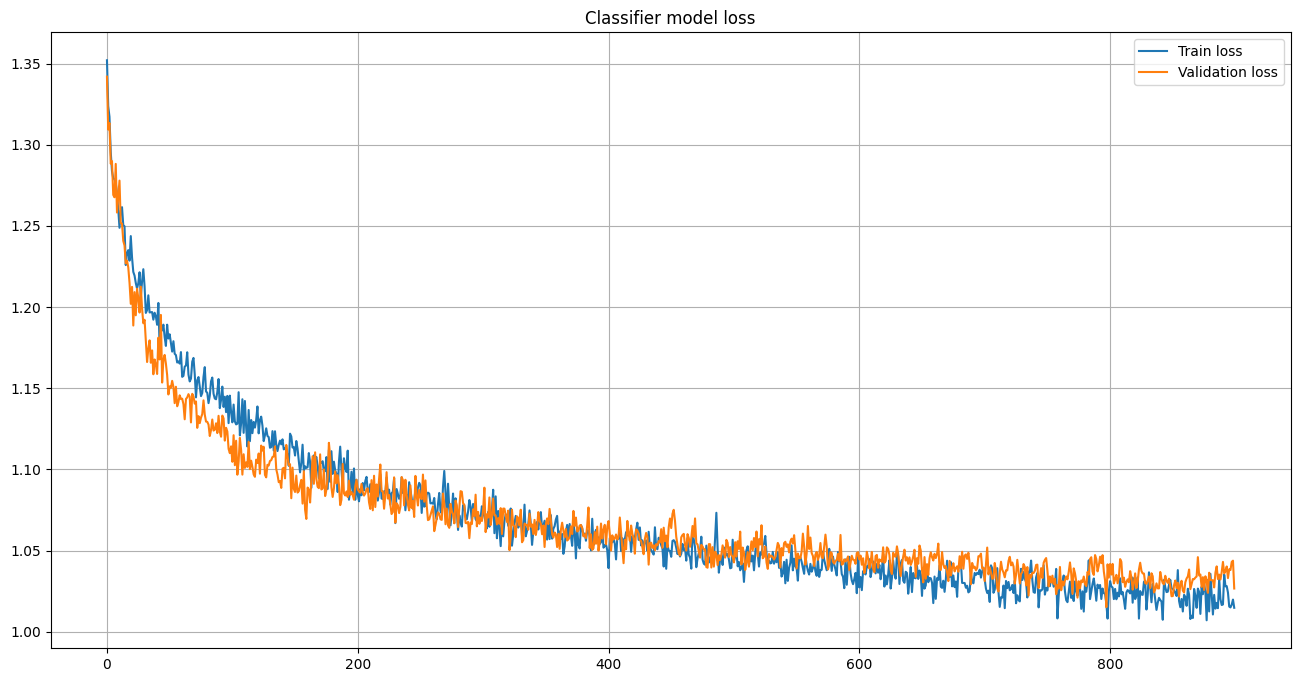

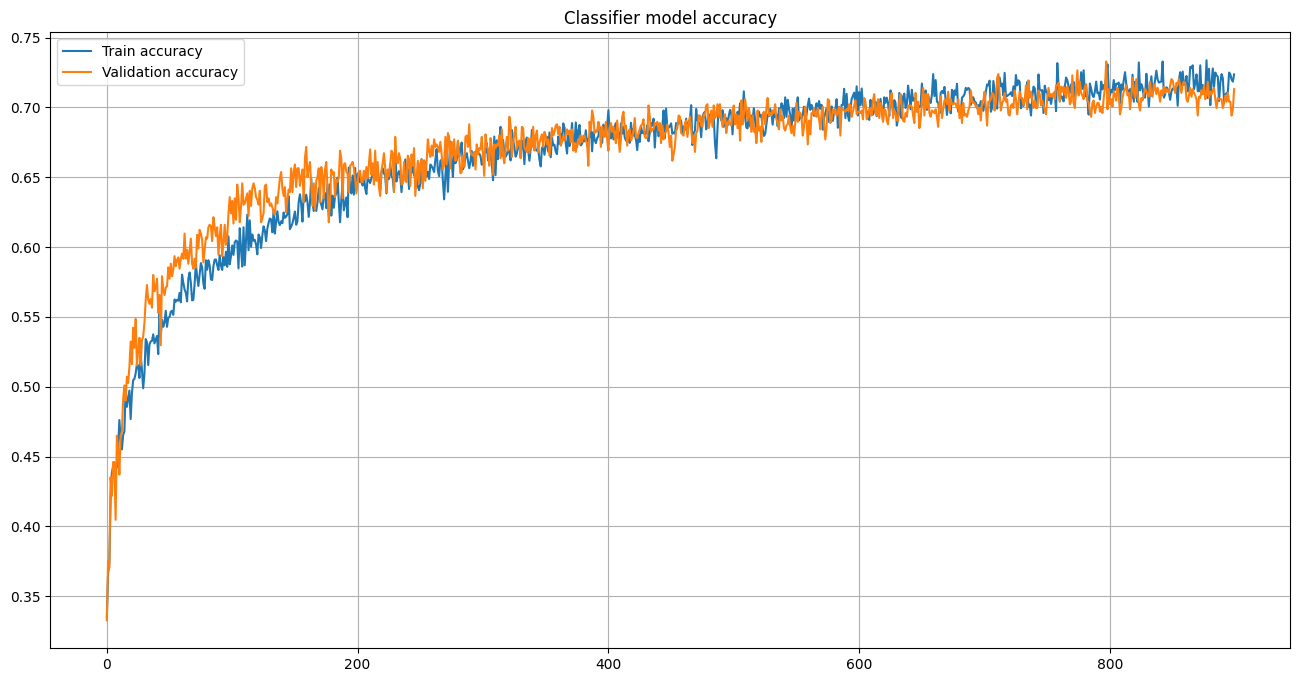

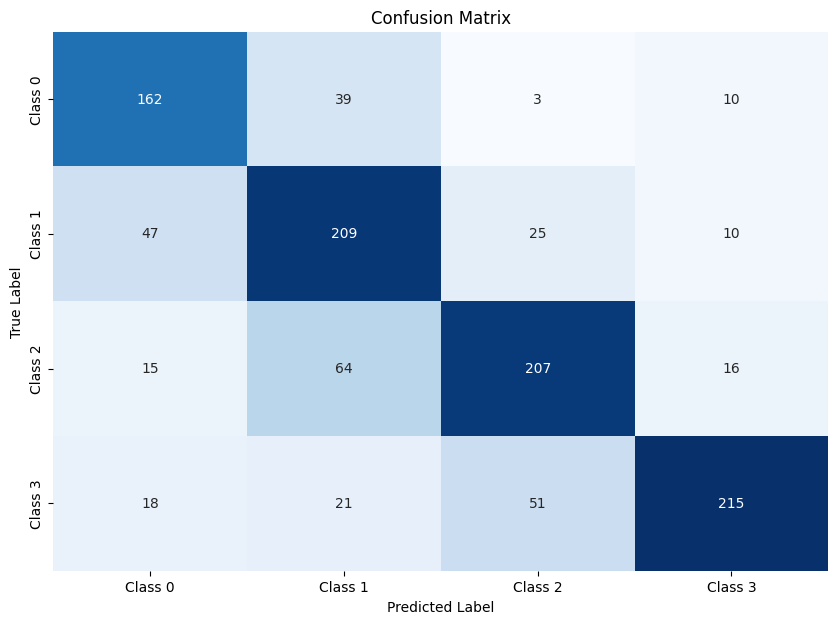

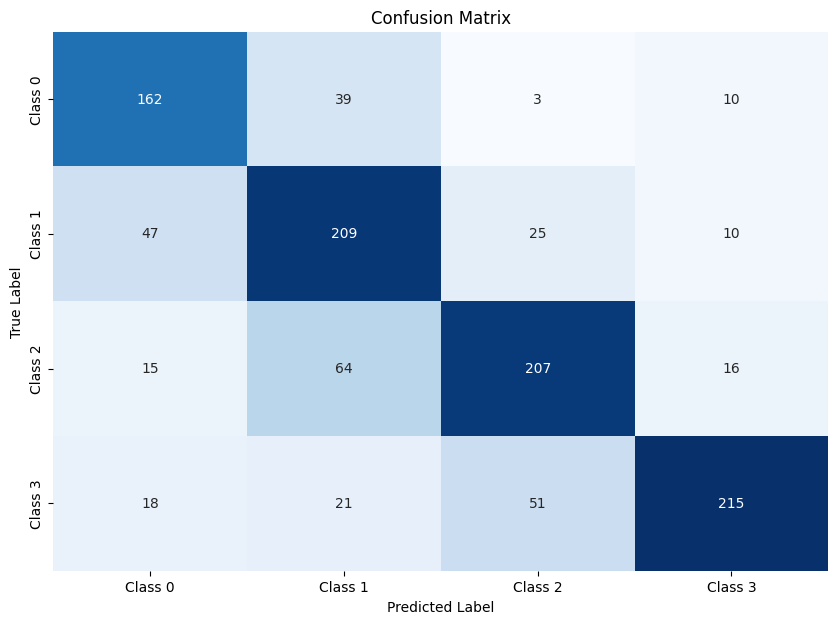

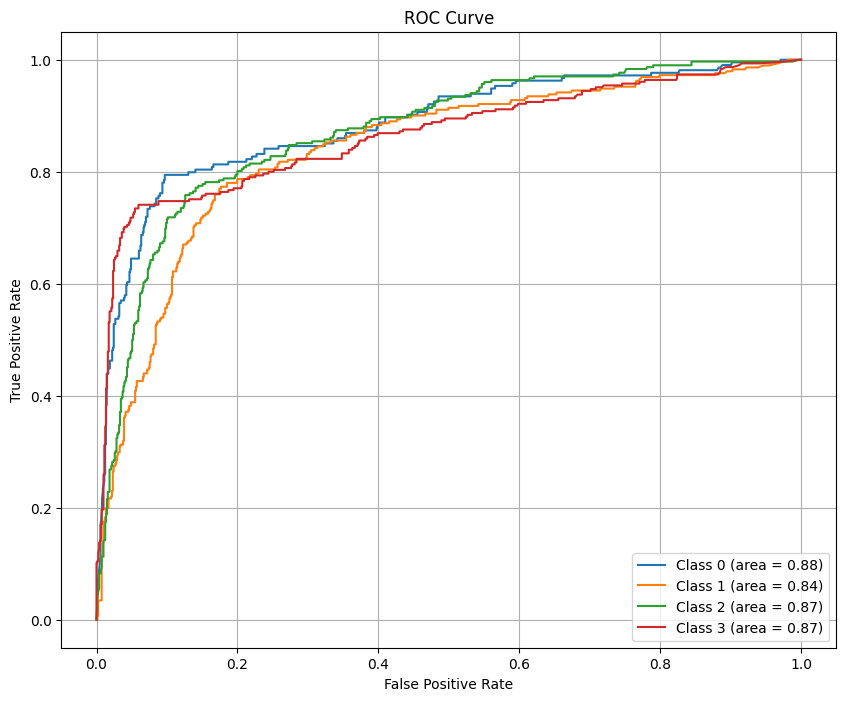

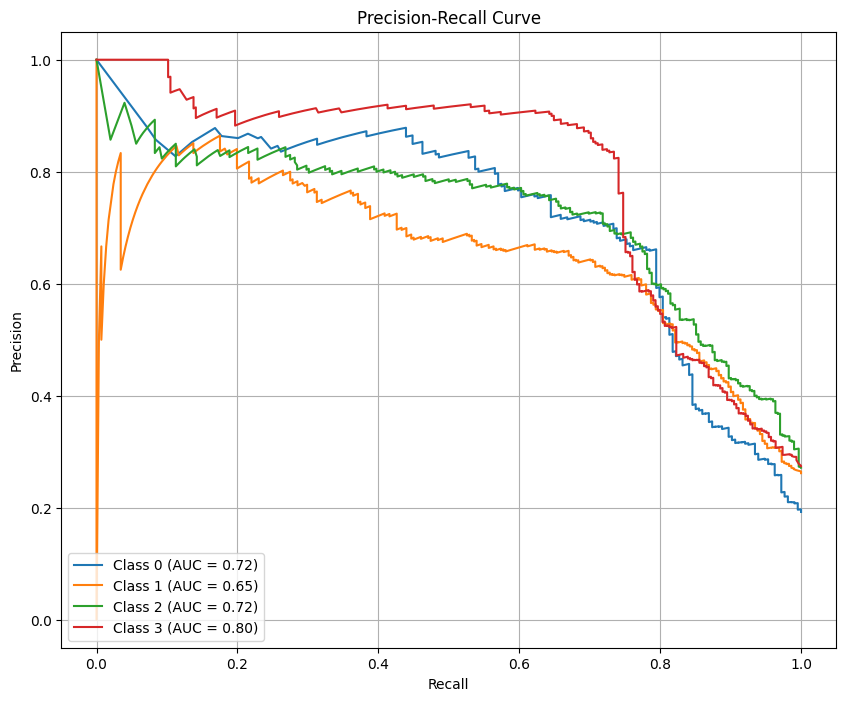

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, roc_curve

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler

import torch
import torch.nn as nn
import torch.nn.functional as F


class KANTimeSeries(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, num_knots=5, spline_order=3,
                 noise_scale=0.1, base_scale=1.0, spline_scale=1.0,
                 activation=nn.SiLU, grid_epsilon=0.02, grid_range=[-1, 1]):
        super(KANTimeSeries, self).__init__()
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size

        self.layers = nn.ModuleList()
        prev_size = input_size
        for hidden_size in hidden_sizes:
            self.layers.append(SplineLinearLayer(prev_size, hidden_size, num_knots, spline_order,
                                                 noise_scale, base_scale, spline_scale,
                                                 activation, grid_epsilon, grid_range))
            prev_size = hidden_size

        self.output_layer = SplineLinearLayer(prev_size, output_size, num_knots, spline_order,
                                              noise_scale, base_scale, spline_scale,
                                              activation, grid_epsilon, grid_range)

    def forward(self, x, update_knots=False):
        for layer in self.layers:
            if update_knots:
                layer._update_knots(x)
            x = layer(x)

        if update_knots:
            self.output_layer._update_knots(x)
        x = self.output_layer(x)
        return x

    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        loss = 0
        for layer in self.layers:
            loss += layer._regularization_loss(regularize_activation, regularize_entropy)
        loss += self.output_layer._regularization_loss(regularize_activation, regularize_entropy)
        return loss

class ChebyshevKANLayer(nn.Module):
    def __init__(self, input_dim, output_dim, degree, init_method='xavier'):
        super(ChebyshevKANLayer, self).__init__()
        self.inputdim = input_dim
        self.outdim = output_dim
        self.degree = degree

        self.cheby_coeffs = nn.Parameter(torch.empty(input_dim, output_dim, degree + 1))
        self.init_method = init_method
        self.initialize_weights()
        self.register_buffer("arange", torch.arange(0, degree + 1, 1))

    def initialize_weights(self):
        if self.init_method == 'xavier':
            nn.init.xavier_normal_(self.cheby_coeffs)
        elif self.init_method == 'he':
            nn.init.kaiming_normal_(self.cheby_coeffs, nonlinearity='relu')
        elif self.init_method == 'normal':
            nn.init.normal_(self.cheby_coeffs, mean=0.0, std=1.0)
        elif self.init_method == 'uniform':
            nn.init.uniform_(self.cheby_coeffs, a=-0.1, b=0.1)
        elif self.init_method == 'lecun':
            nn.init.kaiming_normal_(self.cheby_coeffs, nonlinearity='linear')
        elif self.init_method == 'orthogonal':
            nn.init.orthogonal_(self.cheby_coeffs)
        else:
            raise ValueError("Unknown initialization method")

    def chebyshev_polynomials(self, x):
        T = [torch.ones_like(x), 2*x]
        for n in range(2, self.degree + 1):
            T.append(2 * x * T[n - 1] - T[n - 2])
        return torch.stack(T, dim=-1)

    def forward(self, x):
        x = x.view(-1, self.inputdim)
        x = torch.tanh(x)
        T = self.chebyshev_polynomials(x)
        y = torch.einsum("bij,ioj->bo", T, self.cheby_coeffs)
        y = y.view(-1, self.outdim)
        return y

class MAEEG(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(MAEEG, self).__init__()

        self.conv1 = nn.Conv1d(in_channels=input_dim, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.dropout1 = nn.Dropout(0.5)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.adaptive_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.conv5 = nn.Conv1d(in_channels=256, out_channels=128, kernel_size=3, stride=1)
        self.global_pool = nn.AdaptiveAvgPool1d(1)

        self.fc0 = nn.Linear(in_features=128, out_features=512)

        self.kan = KANTimeSeries(input_size=512, hidden_sizes=[256], output_size=256)

        self.fc1 = nn.Linear(in_features=256, out_features=64)
        self.bn1 = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(in_features=64, out_features=num_classes)

    def forward(self, x):

        x = F.relu(self.conv1(x))
        x = self.dropout1(x)
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.dropout1(x)
        x = F.relu(self.conv3(x))
        x = self.dropout1(x)

        #x = self.adaptive_pool(x)

        #x = x.squeeze(2)

        x = self.conv5(x)
        x = F.leaky_relu(x)
        x = self.global_pool(x)

        x = x.view(x.size(0), -1)

        x = self.fc0(x)

        x = self.kan(x)

        #x = x[:, -1, :]

        x = self.fc1(x)
        x = self.bn1(x)
        x = self.fc2(x)
        x = F.softmax(x, dim=1)

        return x






def train_classifier(model, train_loader, optimizer, loss_fn):
    model.train()
    train_loss = 0
    correct_train_preds = 0
    total_train_preds = 0

    for x, y in train_loader:
        optimizer.zero_grad()
        output = model(x)
        loss = loss_fn(output, y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()


        _, predicted = torch.max(output, 1)
        correct_train_preds += (predicted == y).sum().item()
        total_train_preds += y.size(0)

    train_accuracy = correct_train_preds / total_train_preds
    return train_loss / len(train_loader), train_accuracy

def evaluate_classifier(model, loader):
    model.eval()
    all_preds = []
    all_probs = []
    all_labels = []
    with torch.no_grad():
        for x, y in loader:
            output = model(x)
            probs = F.softmax(output, dim=1)
            preds = torch.argmax(output, dim=1)
            all_preds.append(preds)
            all_probs.append(probs)
            all_labels.append(y)
    preds = torch.cat(all_preds)
    probs = torch.cat(all_probs)
    labels = torch.cat(all_labels)
    accuracy = accuracy_score(labels.numpy(), preds.numpy())
    return accuracy, preds, labels, probs



def evaluate_loss(model, loader, loss_fn):
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for x, y in loader:
            output = model(x)
            loss = loss_fn(output, y)
            val_loss += loss.item()
    return val_loss / len(loader)

def plot_stats(train_loss, val_loss, train_accuracy, valid_accuracy, title):
    plt.figure(figsize=(16, 8))
    plt.title(title + ' loss')
    plt.plot(train_loss, label='Train loss')
    plt.plot(val_loss, label='Validation loss')
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(16, 8))
    plt.title(title + ' accuracy')
    plt.plot(train_accuracy, label='Train accuracy')
    plt.plot(valid_accuracy, label='Validation accuracy')
    plt.legend()
    plt.grid()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, num_classes):
    cm = confusion_matrix(y_true, y_pred, labels=range(num_classes))
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=[f'Class {i}' for i in range(num_classes)],
                yticklabels=[f'Class {i}' for i in range(num_classes)])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

def plot_roc_auc_curve(y_true, y_probs, num_classes):
    plt.figure(figsize=(10, 8))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_true == i, y_probs[:, i])
        plt.plot(fpr, tpr, label=f'Class {i} (area = {auc(fpr, tpr):.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

def plot_precision_recall_curve(y_true, y_probs, num_classes):
    plt.figure(figsize=(10, 8))
    for i in range(num_classes):
        precision, recall, _ = precision_recall_curve(y_true == i, y_probs[:, i])
        plt.plot(recall, precision, label=f'Class {i} (AUC = {auc(recall, precision):.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.grid()
    plt.show()

def train_and_evaluate_classifier(df_all_clean_array, df_Y_array, num_classes):
    input_dim = df_all_clean_array.shape[1]

    accuracy_train = []
    accuracy_test = []

    val_labels_history = []
    val_preds_history = []
    val_probs_history = []

    train_features, val_features, train_labels, val_labels = train_test_split(df_all_clean_array, df_Y_array, test_size=0.2, random_state=42)

    train_accuracy_history = []
    valid_accuracy_history = []

    train_loss_history = []
    valid_loss_history = []

    scaler = StandardScaler()
    train_features = scaler.fit_transform(train_features.reshape(-1, train_features.shape[-1])).reshape(train_features.shape)
    val_features = scaler.transform(val_features.reshape(-1, val_features.shape[-1])).reshape(val_features.shape)

    train_features = torch.tensor(train_features, dtype=torch.float32)
    val_features = torch.tensor(val_features, dtype=torch.float32)
    train_labels = torch.tensor(train_labels, dtype=torch.long)
    val_labels = torch.tensor(val_labels, dtype=torch.long)


    class_counts = torch.bincount(train_labels)
    class_weights = 1. / class_counts.float()
    sample_weights = class_weights[train_labels]


    sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

    train_loader = DataLoader(TensorDataset(train_features, train_labels), batch_size=128, sampler=sampler)
    val_loader = DataLoader(TensorDataset(val_features, val_labels), batch_size=128, shuffle=False)

    model = MAEEG(input_dim, num_classes)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    loss_fn = nn.CrossEntropyLoss()

    for epoch in range(900):
        train_loss, train_accuracy = train_classifier(model, train_loader, optimizer, loss_fn)
        train_loss_history.append(train_loss)
        val_loss = evaluate_loss(model, val_loader, loss_fn)
        valid_loss_history.append(val_loss)
        val_accuracy, val_preds, val_labels, val_probs = evaluate_classifier(model, val_loader)
        valid_accuracy_history.append(val_accuracy)
        train_accuracy_history.append(train_accuracy)
        print(f'Epoch {epoch}: Train loss {train_loss}, Val loss {val_loss}, Train accuracy {train_accuracy}, Val accuracy {val_accuracy}')

    accuracy_train.append(evaluate_classifier(model, train_loader))
    accuracy_test.append(evaluate_classifier(model, val_loader))

    plot_stats(train_loss_history, valid_loss_history, train_accuracy_history, valid_accuracy_history, 'Classifier model')


    val_labels_np = val_labels.numpy()
    val_preds_np = val_preds.numpy()
    val_probs_np = val_probs.numpy()


    val_labels_history = np.concatenate((val_labels_history, val_labels_np), axis=0) if len(val_labels_history) > 0 else val_labels_np
    val_preds_history = np.concatenate((val_preds_history, val_preds_np), axis=0) if len(val_preds_history) > 0 else val_preds_np
    val_probs_history = np.concatenate((val_probs_history, val_probs_np), axis=0) if len(val_probs_history) > 0 else val_probs_np

    plot_confusion_matrix(val_labels_np, val_preds_np, num_classes)

    plot_confusion_matrix(val_labels_history, val_preds_history, num_classes)
    plot_roc_auc_curve(val_labels_history, val_probs_history, num_classes)
    plot_precision_recall_curve(val_labels_history, val_probs_history, num_classes)

    return accuracy_train, accuracy_test




accuracy_train, accuracy_test = train_and_evaluate_classifier(df_all_clean_array_old, df_Y_array_old,  num_classes=4)

Результаты: <br>

Данные: 20 (испытуемые), 6 (каналов), 4 (класса)  <br>
CNN - LSTM (300 epoch) <br>

CONVx3 + LinerLayer + LSTM + LinerLayer * 2 (Обучаем не обработанные данные) accuracy_train - 64, accuracy_test - 62 <br>
CONVx3 + LinerLayer + LSTM + LinerLayer * 2 (Обучаем обработанные данные) accuracy_train - 62, accuracy_test - 63 <br>

Kolmogorov-Arnold (900 epoch) <br>

CONVx3 + ChebyshevKANLayer + LSTM + ChebyshevKANLayer * 2 (Обучаем не обработанные данные)accuracy_train - 56,  accuracy_test - 61 <br>
CONVx3 + ChebyshevKANLayer + LSTM + ChebyshevKANLayer * 2 (Обучаем обработанные данные) accuracy_train - 58, accuracy_test - 63 <br>

CONVx3 + LinerLayer + TimeSeriesKAN + LinerLayer * 2 (Обучаем не обработанные данные) accuracy_train - 72, accuracy_test - 71 <br>
CONVx3 + LinerLayer + TimeSeriesKAN + LinerLayer * 2 (Обучаем обработанные данные) accuracy_train - 70, accuracy_test - 68
